## 1. 개요

+ 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
+ 구글의 엔지니어인 프랑소와 숄레가 2015년 3월 발표 파급...
+ 내부적으로 텐서플로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝을 할수 있도록 지원

+ http://keras.io/ko


## 2. 주요 특징

+ 모듈화 : 독립적인 모듈들을 조합하여 구현
+ 최소주의 : 각 모듈을 짧고 간결
+ 쉬운 확장성 : 클래스나 함수로 모듈을 쉽게 추가할 수 있다.
+ 파이썬 기반 : 별도의 설정이 필요없다.

## 3. 설치

+ pip uninstall keras
+ pip install keras==2.3.1


## 4. API

1. 준비 : Sequential(), Model()

2. 계층 설정 : Dense()

3. 컴파일 : compile()
    - loss(cost)
        - 다중 분류 : categorical_crosssentropy
        - 이진 분류 : binary_crossentropy
        - 선형 회귀 : mean_squared_error
    - optimizer (최소 비용)
        - SGC
        - RMSprop
        - Adagrad
        - Adadelta
        - Adam
        - Adamx
        - Nadam
        
4. 학습(훈련) : fit()

5. 평가 : evaluate()

6. 예측 : predict()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import tensorflow as tf

import warnings
warnings.filterwarnings(action="ignore")

import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD


import tensorflow as tf

with tf.compat.v1.Session() as sess:
  h = tf.constant("Hello")
  w = tf.constant("World!")
  hw = h + w
  ans = sess.run(hw)
  print(ans)



b'HelloWorld!'


# 1. 단순 선형회귀

## (1)  Tensorflow를 이용한 코드

In [10]:
# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = [1,2,3,4,5]
y_train = [2.1,3.1,4.1,5.1,6.1]

# W는 1, bias는 1.1
W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 2.경사하강 알고리즘으로


optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.01)
train = optimizer.minimize(cost)



###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, weight, c,bias = sess.run([train, cost,W,b])
    
    if step % 200 == 0:
        print(step, c,weight, bias)
        
sess.close()


# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.



AttributeError: module 'tensorflow' has no attribute 'random_normal'

# (2) Keras 로 구현

In [11]:
#### 데이터 준비
### 이렇게 하면 더 간단함!! #위에랑 동일

x_train = [1,2,3,4,5]
y_train = [2.1,3.1,4.1,5.1,6.1]

model =Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.compile(loss="mse",optimizer=Adam(lr=0.01))
result = model.fit(x_train,y_train,epochs=2001)




Epoch 1/2001
5/5 [==============================] - 0s 55ms/step - loss: 0.7088
Epoch 2/2001
5/5 [==============================] - 0s 797us/step - loss: 0.6475
Epoch 3/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 4/2001
5/5 [==============================] - 0s 2ms/step - loss: 0.5363
Epoch 5/2001
5/5 [==============================] - 0s 790us/step - loss: 0.4863
Epoch 6/2001
5/5 [==============================] - 0s 840us/step - loss: 0.4402
Epoch 7/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 8/2001
5/5 [==============================] - 0s 999us/step - loss: 0.3595
Epoch 9/2001
5/5 [==============================] - 0s 861us/step - loss: 0.3249
Epoch 10/2001
5/5 [==============================] - 0s 3ms/step - loss: 0.2940
Epoch 11/2001
5/5 [==============================] - 0s 676us/step - loss: 0.2667
Epoch 12/2001
5/5 [==============================] - 0s 776us/step - loss: 0.2429
Epoch 13/2001
5/5 [============

Epoch 94/2001
5/5 [==============================] - 0s 473us/step - loss: 0.0750
Epoch 95/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0741
Epoch 96/2001
5/5 [==============================] - 0s 430us/step - loss: 0.0731
Epoch 97/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0722
Epoch 98/2001
5/5 [==============================] - 0s 818us/step - loss: 0.0712
Epoch 99/2001
5/5 [==============================] - 0s 475us/step - loss: 0.0703
Epoch 100/2001
5/5 [==============================] - 0s 642us/step - loss: 0.0694
Epoch 101/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0685
Epoch 102/2001
5/5 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 103/2001
5/5 [==============================] - 0s 304us/step - loss: 0.0667
Epoch 104/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 105/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 106/2001
5/5

Epoch 194/2001
5/5 [==============================] - 0s 624us/step - loss: 0.0152
Epoch 195/2001
5/5 [==============================] - 0s 400us/step - loss: 0.0149
Epoch 196/2001
5/5 [==============================] - 0s 598us/step - loss: 0.0147
Epoch 197/2001
5/5 [==============================] - 0s 599us/step - loss: 0.0144
Epoch 198/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0141
Epoch 199/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0138
Epoch 200/2001
5/5 [==============================] - 0s 598us/step - loss: 0.0136
Epoch 201/2001
5/5 [==============================] - 0s 627us/step - loss: 0.0133
Epoch 202/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0131
Epoch 203/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0128
Epoch 204/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 205/2001
5/5 [==============================] - 0s 602us/step - loss: 0.0123
Epoch 

Epoch 293/2001
5/5 [==============================] - 0s 400us/step - loss: 0.0018
Epoch 294/2001
5/5 [==============================] - 0s 598us/step - loss: 0.0018
Epoch 295/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 296/2001
5/5 [==============================] - 0s 605us/step - loss: 0.0017
Epoch 297/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 298/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0016
Epoch 299/2001
5/5 [==============================] - 0s 600us/step - loss: 0.0016
Epoch 300/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0015
Epoch 301/2001
5/5 [==============================] - 0s 452us/step - loss: 0.0015
Epoch 302/2001
5/5 [==============================] - 0s 560us/step - loss: 0.0014
Epoch 303/2001
5/5 [==============================] - 0s 442us/step - loss: 0.0014
Epoch 304/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0014
Epoch 30

Epoch 389/2001
5/5 [==============================] - 0s 673us/step - loss: 1.3559e-04
Epoch 390/2001
5/5 [==============================] - 0s 1ms/step - loss: 1.3164e-04
Epoch 391/2001
5/5 [==============================] - 0s 1ms/step - loss: 1.2780e-04
Epoch 392/2001
5/5 [==============================] - 0s 632us/step - loss: 1.2406e-04
Epoch 393/2001
5/5 [==============================] - 0s 838us/step - loss: 1.2043e-04
Epoch 394/2001
5/5 [==============================] - 0s 598us/step - loss: 1.1690e-04
Epoch 395/2001
5/5 [==============================] - 0s 798us/step - loss: 1.1346e-04
Epoch 396/2001
5/5 [==============================] - 0s 967us/step - loss: 1.1012e-04
Epoch 397/2001
5/5 [==============================] - 0s 906us/step - loss: 1.0688e-04
Epoch 398/2001
5/5 [==============================] - 0s 788us/step - loss: 1.0372e-04
Epoch 399/2001
5/5 [==============================] - 0s 419us/step - loss: 1.0065e-04
Epoch 400/2001
5/5 [===========================

Epoch 484/2001
5/5 [==============================] - 0s 897us/step - loss: 6.4000e-06
Epoch 485/2001
5/5 [==============================] - 0s 1ms/step - loss: 6.1806e-06
Epoch 486/2001
5/5 [==============================] - 0s 799us/step - loss: 5.9691e-06
Epoch 487/2001
5/5 [==============================] - 0s 1ms/step - loss: 5.7635e-06
Epoch 488/2001
5/5 [==============================] - 0s 621us/step - loss: 5.5661e-06
Epoch 489/2001
5/5 [==============================] - 0s 399us/step - loss: 5.3738e-06
Epoch 490/2001
5/5 [==============================] - 0s 643us/step - loss: 5.1884e-06
Epoch 491/2001
5/5 [==============================] - 0s 598us/step - loss: 5.0089e-06
Epoch 492/2001
5/5 [==============================] - 0s 923us/step - loss: 4.8361e-06
Epoch 493/2001
5/5 [==============================] - 0s 1ms/step - loss: 4.6686e-06
Epoch 494/2001
5/5 [==============================] - 0s 798us/step - loss: 4.5068e-06
Epoch 495/2001
5/5 [=============================

Epoch 579/2001
5/5 [==============================] - 0s 399us/step - loss: 1.8140e-07
Epoch 580/2001
5/5 [==============================] - 0s 381us/step - loss: 1.7417e-07
Epoch 581/2001
5/5 [==============================] - 0s 2ms/step - loss: 1.6732e-07
Epoch 582/2001
5/5 [==============================] - 0s 599us/step - loss: 1.6061e-07
Epoch 583/2001
5/5 [==============================] - 0s 906us/step - loss: 1.5437e-07
Epoch 584/2001
5/5 [==============================] - 0s 399us/step - loss: 1.4817e-07
Epoch 585/2001
5/5 [==============================] - 0s 501us/step - loss: 1.4232e-07
Epoch 586/2001
5/5 [==============================] - 0s 2ms/step - loss: 1.3660e-07
Epoch 587/2001
5/5 [==============================] - 0s 658us/step - loss: 1.3116e-07
Epoch 588/2001
5/5 [==============================] - 0s 799us/step - loss: 1.2590e-07
Epoch 589/2001
5/5 [==============================] - 0s 399us/step - loss: 1.2092e-07
Epoch 590/2001
5/5 [===========================

Epoch 674/2001
5/5 [==============================] - 0s 642us/step - loss: 3.0088e-09
Epoch 675/2001
5/5 [==============================] - 0s 798us/step - loss: 2.8540e-09
Epoch 676/2001
5/5 [==============================] - 0s 863us/step - loss: 2.7301e-09
Epoch 677/2001
5/5 [==============================] - 0s 641us/step - loss: 2.6025e-09
Epoch 678/2001
5/5 [==============================] - 0s 1ms/step - loss: 2.4863e-09
Epoch 679/2001
5/5 [==============================] - 0s 623us/step - loss: 2.3699e-09
Epoch 680/2001
5/5 [==============================] - 0s 618us/step - loss: 2.2594e-09
Epoch 681/2001
5/5 [==============================] - 0s 398us/step - loss: 2.1598e-09
Epoch 682/2001
5/5 [==============================] - 0s 2ms/step - loss: 2.0677e-09
Epoch 683/2001
5/5 [==============================] - 0s 522us/step - loss: 1.9771e-09
Epoch 684/2001
5/5 [==============================] - 0s 399us/step - loss: 1.8735e-09
Epoch 685/2001
5/5 [===========================

Epoch 769/2001
5/5 [==============================] - 0s 369us/step - loss: 2.8194e-11
Epoch 770/2001
5/5 [==============================] - 0s 706us/step - loss: 2.6751e-11
Epoch 771/2001
5/5 [==============================] - 0s 378us/step - loss: 2.6387e-11
Epoch 772/2001
5/5 [==============================] - 0s 599us/step - loss: 2.5557e-11
Epoch 773/2001
5/5 [==============================] - 0s 448us/step - loss: 2.3533e-11
Epoch 774/2001
5/5 [==============================] - 0s 367us/step - loss: 2.2385e-11
Epoch 775/2001
5/5 [==============================] - 0s 399us/step - loss: 2.0248e-11
Epoch 776/2001
5/5 [==============================] - 0s 588us/step - loss: 2.0248e-11
Epoch 777/2001
5/5 [==============================] - 0s 368us/step - loss: 1.9531e-11
Epoch 778/2001
5/5 [==============================] - 0s 688us/step - loss: 1.8156e-11
Epoch 779/2001
5/5 [==============================] - 0s 501us/step - loss: 1.7337e-11
Epoch 780/2001
5/5 [=======================

Epoch 864/2001
5/5 [==============================] - 0s 527us/step - loss: 1.4097e-12
Epoch 865/2001
5/5 [==============================] - 0s 400us/step - loss: 1.4097e-12
Epoch 866/2001
5/5 [==============================] - 0s 668us/step - loss: 1.4097e-12
Epoch 867/2001
5/5 [==============================] - 0s 708us/step - loss: 1.4097e-12
Epoch 868/2001
5/5 [==============================] - 0s 522us/step - loss: 1.4097e-12
Epoch 869/2001
5/5 [==============================] - 0s 399us/step - loss: 1.4097e-12
Epoch 870/2001
5/5 [==============================] - 0s 767us/step - loss: 1.4097e-12
Epoch 871/2001
5/5 [==============================] - 0s 1ms/step - loss: 1.4097e-12
Epoch 872/2001
5/5 [==============================] - 0s 548us/step - loss: 1.4097e-12
Epoch 873/2001
5/5 [==============================] - 0s 3ms/step - loss: 1.4097e-12
Epoch 874/2001
5/5 [==============================] - 0s 455us/step - loss: 1.4097e-12
Epoch 875/2001
5/5 [===========================

Epoch 959/2001
5/5 [==============================] - 0s 400us/step - loss: 1.4097e-12
Epoch 960/2001
5/5 [==============================] - 0s 374us/step - loss: 1.4097e-12
Epoch 961/2001
5/5 [==============================] - 0s 598us/step - loss: 1.4097e-12
Epoch 962/2001
5/5 [==============================] - 0s 483us/step - loss: 1.4097e-12
Epoch 963/2001
5/5 [==============================] - 0s 1ms/step - loss: 1.4097e-12
Epoch 964/2001
5/5 [==============================] - 0s 598us/step - loss: 1.4097e-12
Epoch 965/2001
5/5 [==============================] - 0s 422us/step - loss: 1.4097e-12
Epoch 966/2001
5/5 [==============================] - 0s 501us/step - loss: 1.4097e-12
Epoch 967/2001
5/5 [==============================] - 0s 397us/step - loss: 1.4097e-12
Epoch 968/2001
5/5 [==============================] - 0s 400us/step - loss: 1.4097e-12
Epoch 969/2001
5/5 [==============================] - 0s 966us/step - loss: 1.4097e-12
Epoch 970/2001
5/5 [=========================

Epoch 1053/2001
5/5 [==============================] - 0s 798us/step - loss: 1.4097e-12
Epoch 1054/2001
5/5 [==============================] - 0s 399us/step - loss: 1.4097e-12
Epoch 1055/2001
5/5 [==============================] - 0s 399us/step - loss: 1.4097e-12
Epoch 1056/2001
5/5 [==============================] - 0s 604us/step - loss: 1.4097e-12
Epoch 1057/2001
5/5 [==============================] - 0s 485us/step - loss: 1.4097e-12
Epoch 1058/2001
5/5 [==============================] - 0s 399us/step - loss: 1.4097e-12
Epoch 1059/2001
5/5 [==============================] - 0s 598us/step - loss: 1.4097e-12
Epoch 1060/2001
5/5 [==============================] - 0s 701us/step - loss: 1.4097e-12
Epoch 1061/2001
5/5 [==============================] - 0s 405us/step - loss: 1.4097e-12
Epoch 1062/2001
5/5 [==============================] - 0s 798us/step - loss: 1.4097e-12
Epoch 1063/2001
5/5 [==============================] - 0s 599us/step - loss: 1.4097e-12
Epoch 1064/2001
5/5 [===========

Epoch 1147/2001
5/5 [==============================] - 0s 622us/step - loss: 1.4097e-12
Epoch 1148/2001
5/5 [==============================] - 0s 1ms/step - loss: 1.4097e-12
Epoch 1149/2001
5/5 [==============================] - 0s 599us/step - loss: 1.4097e-12
Epoch 1150/2001
5/5 [==============================] - 0s 456us/step - loss: 1.4097e-12
Epoch 1151/2001
5/5 [==============================] - 0s 727us/step - loss: 1.4097e-12
Epoch 1152/2001
5/5 [==============================] - 0s 325us/step - loss: 1.4097e-12
Epoch 1153/2001
5/5 [==============================] - 0s 420us/step - loss: 1.4097e-12
Epoch 1154/2001
5/5 [==============================] - 0s 605us/step - loss: 1.4097e-12
Epoch 1155/2001
5/5 [==============================] - 0s 798us/step - loss: 1.4097e-12
Epoch 1156/2001
5/5 [==============================] - 0s 1ms/step - loss: 1.4097e-12
Epoch 1157/2001
5/5 [==============================] - 0s 603us/step - loss: 1.4097e-12
Epoch 1158/2001
5/5 [===============

Epoch 1241/2001
5/5 [==============================] - 0s 421us/step - loss: 7.3896e-13
Epoch 1242/2001
5/5 [==============================] - 0s 419us/step - loss: 7.3896e-13
Epoch 1243/2001
5/5 [==============================] - 0s 879us/step - loss: 6.8212e-13
Epoch 1244/2001
5/5 [==============================] - 0s 583us/step - loss: 6.8212e-13
Epoch 1245/2001
5/5 [==============================] - 0s 746us/step - loss: 6.8212e-13
Epoch 1246/2001
5/5 [==============================] - 0s 590us/step - loss: 6.8212e-13
Epoch 1247/2001
5/5 [==============================] - 0s 565us/step - loss: 6.8212e-13
Epoch 1248/2001
5/5 [==============================] - 0s 465us/step - loss: 6.8212e-13
Epoch 1249/2001
5/5 [==============================] - 0s 598us/step - loss: 6.8212e-13
Epoch 1250/2001
5/5 [==============================] - 0s 399us/step - loss: 6.8212e-13
Epoch 1251/2001
5/5 [==============================] - 0s 410us/step - loss: 5.2296e-13
Epoch 1252/2001
5/5 [===========

Epoch 1335/2001
5/5 [==============================] - 0s 439us/step - loss: 3.6380e-13
Epoch 1336/2001
5/5 [==============================] - 0s 1ms/step - loss: 3.6380e-13
Epoch 1337/2001
5/5 [==============================] - 0s 598us/step - loss: 3.6380e-13
Epoch 1338/2001
5/5 [==============================] - 0s 598us/step - loss: 3.6380e-13
Epoch 1339/2001
5/5 [==============================] - 0s 998us/step - loss: 3.6380e-13
Epoch 1340/2001
5/5 [==============================] - 0s 987us/step - loss: 3.6380e-13
Epoch 1341/2001
5/5 [==============================] - 0s 594us/step - loss: 3.6380e-13
Epoch 1342/2001
5/5 [==============================] - 0s 393us/step - loss: 3.6380e-13
Epoch 1343/2001
5/5 [==============================] - 0s 659us/step - loss: 3.6380e-13
Epoch 1344/2001
5/5 [==============================] - 0s 586us/step - loss: 3.6380e-13
Epoch 1345/2001
5/5 [==============================] - 0s 599us/step - loss: 3.6380e-13
Epoch 1346/2001
5/5 [=============

Epoch 1429/2001
5/5 [==============================] - 0s 696us/step - loss: 3.6380e-13
Epoch 1430/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1431/2001
5/5 [==============================] - 0s 445us/step - loss: 3.6380e-13
Epoch 1432/2001
5/5 [==============================] - 0s 358us/step - loss: 3.6380e-13
Epoch 1433/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1434/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1435/2001
5/5 [==============================] - 0s 540us/step - loss: 3.6380e-13
Epoch 1436/2001
5/5 [==============================] - 0s 1ms/step - loss: 3.6380e-13
Epoch 1437/2001
5/5 [==============================] - 0s 798us/step - loss: 3.6380e-13
Epoch 1438/2001
5/5 [==============================] - 0s 223us/step - loss: 3.6380e-13
Epoch 1439/2001
5/5 [==============================] - 0s 341us/step - loss: 3.6380e-13
Epoch 1440/2001
5/5 [=============

Epoch 1523/2001
5/5 [==============================] - 0s 901us/step - loss: 3.6380e-13
Epoch 1524/2001
5/5 [==============================] - 0s 598us/step - loss: 3.6380e-13
Epoch 1525/2001
5/5 [==============================] - 0s 397us/step - loss: 3.6380e-13
Epoch 1526/2001
5/5 [==============================] - 0s 578us/step - loss: 3.6380e-13
Epoch 1527/2001
5/5 [==============================] - 0s 397us/step - loss: 3.6380e-13
Epoch 1528/2001
5/5 [==============================] - 0s 1ms/step - loss: 3.6380e-13
Epoch 1529/2001
5/5 [==============================] - 0s 724us/step - loss: 3.6380e-13
Epoch 1530/2001
5/5 [==============================] - 0s 798us/step - loss: 3.6380e-13
Epoch 1531/2001
5/5 [==============================] - 0s 827us/step - loss: 3.6380e-13
Epoch 1532/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1533/2001
5/5 [==============================] - 0s 595us/step - loss: 3.6380e-13
Epoch 1534/2001
5/5 [=============

Epoch 1617/2001
5/5 [==============================] - 0s 2ms/step - loss: 3.6380e-13
Epoch 1618/2001
5/5 [==============================] - 0s 597us/step - loss: 3.6380e-13
Epoch 1619/2001
5/5 [==============================] - 0s 702us/step - loss: 3.6380e-13
Epoch 1620/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1621/2001
5/5 [==============================] - 0s 514us/step - loss: 3.6380e-13
Epoch 1622/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1623/2001
5/5 [==============================] - 0s 598us/step - loss: 3.6380e-13
Epoch 1624/2001
5/5 [==============================] - 0s 863us/step - loss: 3.6380e-13
Epoch 1625/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1626/2001
5/5 [==============================] - 0s 520us/step - loss: 3.6380e-13
Epoch 1627/2001
5/5 [==============================] - 0s 1ms/step - loss: 3.6380e-13
Epoch 1628/2001
5/5 [===============

Epoch 1711/2001
5/5 [==============================] - 0s 849us/step - loss: 3.6380e-13
Epoch 1712/2001
5/5 [==============================] - 0s 642us/step - loss: 3.6380e-13
Epoch 1713/2001
5/5 [==============================] - 0s 602us/step - loss: 3.6380e-13
Epoch 1714/2001
5/5 [==============================] - 0s 396us/step - loss: 3.6380e-13
Epoch 1715/2001
5/5 [==============================] - 0s 795us/step - loss: 3.6380e-13
Epoch 1716/2001
5/5 [==============================] - 0s 605us/step - loss: 3.6380e-13
Epoch 1717/2001
5/5 [==============================] - 0s 395us/step - loss: 3.6380e-13
Epoch 1718/2001
5/5 [==============================] - 0s 598us/step - loss: 3.6380e-13
Epoch 1719/2001
5/5 [==============================] - 0s 859us/step - loss: 3.6380e-13
Epoch 1720/2001
5/5 [==============================] - 0s 597us/step - loss: 3.6380e-13
Epoch 1721/2001
5/5 [==============================] - 0s 422us/step - loss: 3.6380e-13
Epoch 1722/2001
5/5 [===========

Epoch 1805/2001
5/5 [==============================] - 0s 600us/step - loss: 3.6380e-13
Epoch 1806/2001
5/5 [==============================] - 0s 375us/step - loss: 3.6380e-13
Epoch 1807/2001
5/5 [==============================] - 0s 373us/step - loss: 3.6380e-13
Epoch 1808/2001
5/5 [==============================] - 0s 1ms/step - loss: 3.6380e-13
Epoch 1809/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1810/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1811/2001
5/5 [==============================] - 0s 924us/step - loss: 3.6380e-13
Epoch 1812/2001
5/5 [==============================] - 0s 398us/step - loss: 3.6380e-13
Epoch 1813/2001
5/5 [==============================] - 0s 512us/step - loss: 3.6380e-13
Epoch 1814/2001
5/5 [==============================] - 0s 798us/step - loss: 3.6380e-13
Epoch 1815/2001
5/5 [==============================] - 0s 526us/step - loss: 3.6380e-13
Epoch 1816/2001
5/5 [=============

Epoch 1899/2001
5/5 [==============================] - 0s 599us/step - loss: 3.6380e-13
Epoch 1900/2001
5/5 [==============================] - 0s 995us/step - loss: 3.6380e-13
Epoch 1901/2001
5/5 [==============================] - 0s 997us/step - loss: 3.6380e-13
Epoch 1902/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1903/2001
5/5 [==============================] - 0s 1ms/step - loss: 3.6380e-13
Epoch 1904/2001
5/5 [==============================] - 0s 459us/step - loss: 3.6380e-13
Epoch 1905/2001
5/5 [==============================] - 0s 929us/step - loss: 3.6380e-13
Epoch 1906/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1907/2001
5/5 [==============================] - 0s 580us/step - loss: 3.6380e-13
Epoch 1908/2001
5/5 [==============================] - 0s 600us/step - loss: 3.6380e-13
Epoch 1909/2001
5/5 [==============================] - 0s 798us/step - loss: 3.6380e-13
Epoch 1910/2001
5/5 [=============

Epoch 1993/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1994/2001
5/5 [==============================] - 0s 576us/step - loss: 3.6380e-13
Epoch 1995/2001
5/5 [==============================] - 0s 399us/step - loss: 3.6380e-13
Epoch 1996/2001
5/5 [==============================] - 0s 798us/step - loss: 3.6380e-13
Epoch 1997/2001
5/5 [==============================] - 0s 804us/step - loss: 3.6380e-13
Epoch 1998/2001
5/5 [==============================] - 0s 799us/step - loss: 3.6380e-13
Epoch 1999/2001
5/5 [==============================] - 0s 606us/step - loss: 3.6380e-13
Epoch 2000/2001
5/5 [==============================] - 0s 598us/step - loss: 3.6380e-13
Epoch 2001/2001
5/5 [==============================] - 0s 447us/step - loss: 3.6380e-13


array([[7.1000004]], dtype=float32)

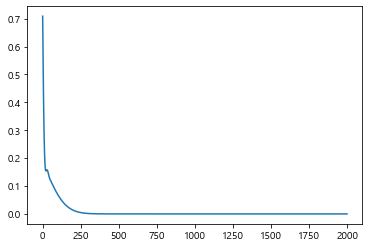

In [15]:
model.get_weights()

result.history.keys()
#print(result.history["loss"])

plt.plot(result.history["loss"])

model.predict([6])

In [17]:
X =[1,2,3,4,5,6,7]

y =[25000,55000,75000,110000,128000,155000,180000]


############모델 완성

# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = tf.placeholder(tf.float32 , shape=[None]) # None 지정해준다 알아서
y_train = tf.placeholder(tf.float32 , shape=[None]) # 판다스에서 -1지정해주면 크기구애x

W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 
# 2.경사하강 알고리즘으로(Gradient Descent)
# 공식안써도 이걸쓰면 더 확실하게된다.. 이게 좀 더 편하긴함...훈련시키기에도


##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)



###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(500):
    _, c = sess.run([update,cost],feed_dict={x_train:X,y_train:y})
    

    if step % 100 ==0:
        print(step,c)



# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.
# y=wx+b
# w가 1에 가까워질수록 1.1에 가까워진다.


sess.run(hypot,feed_dict={x_train:[8]})

sess.close()

0 13456376000.0
100 9834235.0
200 9188761.0
300 8890033.0
400 8751773.0


Epoch 1/2000
7/7 [==============================] - 0s 25ms/step - loss: 13453599744.0000
Epoch 2/2000
7/7 [==============================] - 0s 285us/step - loss: 13329380352.0000
Epoch 3/2000
7/7 [==============================] - 0s 428us/step - loss: 13205756928.0000
Epoch 4/2000
7/7 [==============================] - 0s 428us/step - loss: 13082740736.0000
Epoch 5/2000
7/7 [==============================] - 0s 713us/step - loss: 12960336896.0000
Epoch 6/2000
7/7 [==============================] - 0s 997us/step - loss: 12838559744.0000
Epoch 7/2000
7/7 [==============================] - 0s 571us/step - loss: 12717416448.0000
Epoch 8/2000
7/7 [==============================] - 0s 283us/step - loss: 12596918272.0000
Epoch 9/2000
7/7 [==============================] - 0s 713us/step - loss: 12477069312.0000
Epoch 10/2000
7/7 [==============================] - 0s 285us/step - loss: 12357882880.0000
Epoch 11/2000
7/7 [==============================] - 0s 427us/step - loss: 12239365120.000

Epoch 91/2000
7/7 [==============================] - 0s 855us/step - loss: 5117823488.0000
Epoch 92/2000
7/7 [==============================] - 0s 428us/step - loss: 5056469504.0000
Epoch 93/2000
7/7 [==============================] - 0s 285us/step - loss: 4995707392.0000
Epoch 94/2000
7/7 [==============================] - 0s 285us/step - loss: 4935535104.0000
Epoch 95/2000
7/7 [==============================] - 0s 428us/step - loss: 4875946496.0000
Epoch 96/2000
7/7 [==============================] - 0s 285us/step - loss: 4816939520.0000
Epoch 97/2000
7/7 [==============================] - 0s 427us/step - loss: 4758221312.0000
Epoch 98/2000
7/7 [==============================] - 0s 570us/step - loss: 4700085248.0000
Epoch 99/2000
7/7 [==============================] - 0s 2ms/step - loss: 4642803200.0000
Epoch 100/2000
7/7 [==============================] - 0s 285us/step - loss: 4585817088.0000
Epoch 101/2000
7/7 [==============================] - 0s 428us/step - loss: 4529400320.0000

Epoch 181/2000
7/7 [==============================] - 0s 647us/step - loss: 1540399488.0000
Epoch 182/2000
7/7 [==============================] - 0s 426us/step - loss: 1518175360.0000
Epoch 183/2000
7/7 [==============================] - 0s 285us/step - loss: 1496183424.0000
Epoch 184/2000
7/7 [==============================] - 0s 1ms/step - loss: 1474530176.0000
Epoch 185/2000
7/7 [==============================] - 0s 713us/step - loss: 1453157632.0000
Epoch 186/2000
7/7 [==============================] - 0s 726us/step - loss: 1432063104.0000
Epoch 187/2000
7/7 [==============================] - 0s 855us/step - loss: 1411244672.0000
Epoch 188/2000
7/7 [==============================] - 0s 428us/step - loss: 1390698240.0000
Epoch 189/2000
7/7 [==============================] - 0s 713us/step - loss: 1370422144.0000
Epoch 190/2000
7/7 [==============================] - 0s 570us/step - loss: 1350413056.0000
Epoch 191/2000
7/7 [==============================] - 0s 569us/step - loss: 133062

Epoch 271/2000
7/7 [==============================] - 0s 427us/step - loss: 396271584.0000
Epoch 272/2000
7/7 [==============================] - 0s 713us/step - loss: 390415680.0000
Epoch 273/2000
7/7 [==============================] - 0s 997us/step - loss: 384656480.0000
Epoch 274/2000
7/7 [==============================] - 0s 570us/step - loss: 378984352.0000
Epoch 275/2000
7/7 [==============================] - 0s 427us/step - loss: 373415328.0000
Epoch 276/2000
7/7 [==============================] - 0s 712us/step - loss: 367930880.0000
Epoch 277/2000
7/7 [==============================] - 0s 427us/step - loss: 362537920.0000
Epoch 278/2000
7/7 [==============================] - 0s 570us/step - loss: 357235680.0000
Epoch 279/2000
7/7 [==============================] - 0s 1ms/step - loss: 352030912.0000
Epoch 280/2000
7/7 [==============================] - 0s 569us/step - loss: 346913824.0000
Epoch 281/2000
7/7 [==============================] - 0s 712us/step - loss: 341875360.0000
E

Epoch 362/2000
7/7 [==============================] - 0s 428us/step - loss: 129089024.0000
Epoch 363/2000
7/7 [==============================] - 0s 713us/step - loss: 127992768.0000
Epoch 364/2000
7/7 [==============================] - 0s 428us/step - loss: 126919376.0000
Epoch 365/2000
7/7 [==============================] - 0s 285us/step - loss: 125867112.0000
Epoch 366/2000
7/7 [==============================] - 0s 286us/step - loss: 124834520.0000
Epoch 367/2000
7/7 [==============================] - 0s 285us/step - loss: 123822184.0000
Epoch 368/2000
7/7 [==============================] - 0s 427us/step - loss: 122831064.0000
Epoch 369/2000
7/7 [==============================] - 0s 570us/step - loss: 121859472.0000
Epoch 370/2000
7/7 [==============================] - 0s 855us/step - loss: 120906224.0000
Epoch 371/2000
7/7 [==============================] - 0s 285us/step - loss: 119972720.0000
Epoch 372/2000
7/7 [==============================] - 0s 855us/step - loss: 119057896.0000

Epoch 453/2000
7/7 [==============================] - 0s 428us/step - loss: 82702760.0000
Epoch 454/2000
7/7 [==============================] - 0s 570us/step - loss: 82517520.0000
Epoch 455/2000
7/7 [==============================] - 0s 854us/step - loss: 82335360.0000
Epoch 456/2000
7/7 [==============================] - 0s 719us/step - loss: 82156304.0000
Epoch 457/2000
7/7 [==============================] - 0s 428us/step - loss: 81980328.0000
Epoch 458/2000
7/7 [==============================] - 0s 427us/step - loss: 81807216.0000
Epoch 459/2000
7/7 [==============================] - 0s 2ms/step - loss: 81636992.0000
Epoch 460/2000
7/7 [==============================] - 0s 427us/step - loss: 81469488.0000
Epoch 461/2000
7/7 [==============================] - 0s 286us/step - loss: 81304792.0000
Epoch 462/2000
7/7 [==============================] - 0s 570us/step - loss: 81142632.0000
Epoch 463/2000
7/7 [==============================] - 0s 1ms/step - loss: 80983240.0000
Epoch 464/2000

Epoch 545/2000
7/7 [==============================] - 0s 428us/step - loss: 72853144.0000
Epoch 546/2000
7/7 [==============================] - 0s 578us/step - loss: 72783984.0000
Epoch 547/2000
7/7 [==============================] - 0s 285us/step - loss: 72715128.0000
Epoch 548/2000
7/7 [==============================] - 0s 285us/step - loss: 72646512.0000
Epoch 549/2000
7/7 [==============================] - 0s 283us/step - loss: 72578112.0000
Epoch 550/2000
7/7 [==============================] - 0s 427us/step - loss: 72510128.0000
Epoch 551/2000
7/7 [==============================] - 0s 290us/step - loss: 72442312.0000
Epoch 552/2000
7/7 [==============================] - 0s 285us/step - loss: 72374816.0000
Epoch 553/2000
7/7 [==============================] - 0s 570us/step - loss: 72307504.0000
Epoch 554/2000
7/7 [==============================] - 0s 285us/step - loss: 72240456.0000
Epoch 555/2000
7/7 [==============================] - 0s 584us/step - loss: 72173632.0000
Epoch 556/

Epoch 637/2000
7/7 [==============================] - 0s 285us/step - loss: 67089912.0000
Epoch 638/2000
7/7 [==============================] - 0s 855us/step - loss: 67030028.0000
Epoch 639/2000
7/7 [==============================] - 0s 428us/step - loss: 66970112.0000
Epoch 640/2000
7/7 [==============================] - 0s 570us/step - loss: 66910248.0000
Epoch 641/2000
7/7 [==============================] - 0s 425us/step - loss: 66850404.0000
Epoch 642/2000
7/7 [==============================] - 0s 427us/step - loss: 66790584.0000
Epoch 643/2000
7/7 [==============================] - 0s 427us/step - loss: 66730764.0000
Epoch 644/2000
7/7 [==============================] - 0s 285us/step - loss: 66670976.0000
Epoch 645/2000
7/7 [==============================] - 0s 500us/step - loss: 66611232.0000
Epoch 646/2000
7/7 [==============================] - 0s 855us/step - loss: 66551388.0000
Epoch 647/2000
7/7 [==============================] - 0s 427us/step - loss: 66491644.0000
Epoch 648/

7/7 [==============================] - 0s 285us/step - loss: 61682132.0000
Epoch 729/2000
7/7 [==============================] - 0s 427us/step - loss: 61623012.0000
Epoch 730/2000
7/7 [==============================] - 0s 713us/step - loss: 61564000.0000
Epoch 731/2000
7/7 [==============================] - 0s 286us/step - loss: 61504996.0000
Epoch 732/2000
7/7 [==============================] - 0s 427us/step - loss: 61445992.0000
Epoch 733/2000
7/7 [==============================] - 0s 428us/step - loss: 61387012.0000
Epoch 734/2000
7/7 [==============================] - 0s 427us/step - loss: 61328028.0000
Epoch 735/2000
7/7 [==============================] - 0s 427us/step - loss: 61269064.0000
Epoch 736/2000
7/7 [==============================] - 0s 285us/step - loss: 61210072.0000
Epoch 737/2000
7/7 [==============================] - 0s 285us/step - loss: 61151144.0000
Epoch 738/2000
7/7 [==============================] - 0s 427us/step - loss: 61092164.0000
Epoch 739/2000
7/7 [=====

Epoch 820/2000
7/7 [==============================] - 0s 285us/step - loss: 56303588.0000
Epoch 821/2000
7/7 [==============================] - 0s 712us/step - loss: 56245860.0000
Epoch 822/2000
7/7 [==============================] - 0s 285us/step - loss: 56188152.0000
Epoch 823/2000
7/7 [==============================] - 0s 712us/step - loss: 56130452.0000
Epoch 824/2000
7/7 [==============================] - 0s 570us/step - loss: 56072768.0000
Epoch 825/2000
7/7 [==============================] - 0s 570us/step - loss: 56015124.0000
Epoch 826/2000
7/7 [==============================] - 0s 427us/step - loss: 55957432.0000
Epoch 827/2000
7/7 [==============================] - 0s 427us/step - loss: 55899788.0000
Epoch 828/2000
7/7 [==============================] - 0s 646us/step - loss: 55842212.0000
Epoch 829/2000
7/7 [==============================] - 0s 285us/step - loss: 55784572.0000
Epoch 830/2000
7/7 [==============================] - 0s 428us/step - loss: 55727036.0000
Epoch 831/

Epoch 912/2000
7/7 [==============================] - 0s 570us/step - loss: 51080252.0000
Epoch 913/2000
7/7 [==============================] - 0s 571us/step - loss: 51024608.0000
Epoch 914/2000
7/7 [==============================] - 0s 712us/step - loss: 50968980.0000
Epoch 915/2000
7/7 [==============================] - 0s 427us/step - loss: 50913372.0000
Epoch 916/2000
7/7 [==============================] - 0s 427us/step - loss: 50857772.0000
Epoch 917/2000
7/7 [==============================] - 0s 427us/step - loss: 50802204.0000
Epoch 918/2000
7/7 [==============================] - 0s 1ms/step - loss: 50746728.0000
Epoch 919/2000
7/7 [==============================] - 0s 285us/step - loss: 50691204.0000
Epoch 920/2000
7/7 [==============================] - 0s 570us/step - loss: 50635764.0000
Epoch 921/2000
7/7 [==============================] - 0s 427us/step - loss: 50580320.0000
Epoch 922/2000
7/7 [==============================] - 0s 427us/step - loss: 50524936.0000
Epoch 923/20

Epoch 1004/2000
7/7 [==============================] - 0s 427us/step - loss: 46080412.0000
Epoch 1005/2000
7/7 [==============================] - 0s 713us/step - loss: 46027516.0000
Epoch 1006/2000
7/7 [==============================] - 0s 427us/step - loss: 45974632.0000
Epoch 1007/2000
7/7 [==============================] - 0s 285us/step - loss: 45921848.0000
Epoch 1008/2000
7/7 [==============================] - 0s 427us/step - loss: 45868980.0000
Epoch 1009/2000
7/7 [==============================] - 0s 285us/step - loss: 45816216.0000
Epoch 1010/2000
7/7 [==============================] - 0s 285us/step - loss: 45763480.0000
Epoch 1011/2000
7/7 [==============================] - 0s 427us/step - loss: 45710740.0000
Epoch 1012/2000
7/7 [==============================] - 0s 285us/step - loss: 45658092.0000
Epoch 1013/2000
7/7 [==============================] - 0s 570us/step - loss: 45605468.0000
Epoch 1014/2000
7/7 [==============================] - 0s 427us/step - loss: 45552876.0000

Epoch 1095/2000
7/7 [==============================] - 0s 285us/step - loss: 41408852.0000
Epoch 1096/2000
7/7 [==============================] - 0s 427us/step - loss: 41359220.0000
Epoch 1097/2000
7/7 [==============================] - 0s 570us/step - loss: 41309588.0000
Epoch 1098/2000
7/7 [==============================] - 0s 427us/step - loss: 41259980.0000
Epoch 1099/2000
7/7 [==============================] - 0s 285us/step - loss: 41210468.0000
Epoch 1100/2000
7/7 [==============================] - 0s 285us/step - loss: 41160920.0000
Epoch 1101/2000
7/7 [==============================] - 0s 285us/step - loss: 41111500.0000
Epoch 1102/2000
7/7 [==============================] - 0s 427us/step - loss: 41062036.0000
Epoch 1103/2000
7/7 [==============================] - 0s 285us/step - loss: 41012672.0000
Epoch 1104/2000
7/7 [==============================] - 0s 427us/step - loss: 40963332.0000
Epoch 1105/2000
7/7 [==============================] - 0s 570us/step - loss: 40914008.0000

Epoch 1276/2000
7/7 [==============================] - 0s 428us/step - loss: 33077190.0000
Epoch 1277/2000
7/7 [==============================] - 0s 427us/step - loss: 33035004.0000
Epoch 1278/2000
7/7 [==============================] - 0s 428us/step - loss: 32992836.0000
Epoch 1279/2000
7/7 [==============================] - 0s 426us/step - loss: 32950724.0000
Epoch 1280/2000
7/7 [==============================] - 0s 2ms/step - loss: 32908690.0000
Epoch 1281/2000
7/7 [==============================] - 0s 285us/step - loss: 32866652.0000
Epoch 1282/2000
7/7 [==============================] - 0s 427us/step - loss: 32824658.0000
Epoch 1283/2000
7/7 [==============================] - 0s 569us/step - loss: 32782736.0000
Epoch 1284/2000
7/7 [==============================] - 0s 428us/step - loss: 32740876.0000
Epoch 1285/2000
7/7 [==============================] - 0s 570us/step - loss: 32699012.0000
Epoch 1286/2000
7/7 [==============================] - 0s 434us/step - loss: 32657238.0000
E

Epoch 1367/2000
7/7 [==============================] - 0s 570us/step - loss: 29417696.0000
Epoch 1368/2000
7/7 [==============================] - 0s 570us/step - loss: 29379532.0000
Epoch 1369/2000
7/7 [==============================] - 0s 285us/step - loss: 29341376.0000
Epoch 1370/2000
7/7 [==============================] - 0s 285us/step - loss: 29303294.0000
Epoch 1371/2000
7/7 [==============================] - 0s 285us/step - loss: 29265248.0000
Epoch 1372/2000
7/7 [==============================] - 0s 713us/step - loss: 29227232.0000
Epoch 1373/2000
7/7 [==============================] - 0s 569us/step - loss: 29189318.0000
Epoch 1374/2000
7/7 [==============================] - 0s 428us/step - loss: 29151390.0000
Epoch 1375/2000
7/7 [==============================] - 0s 427us/step - loss: 29113524.0000
Epoch 1376/2000
7/7 [==============================] - 0s 712us/step - loss: 29075706.0000
Epoch 1377/2000
7/7 [==============================] - 0s 570us/step - loss: 29037948.0000

Epoch 1458/2000
7/7 [==============================] - 0s 428us/step - loss: 26126066.0000
Epoch 1459/2000
7/7 [==============================] - 0s 285us/step - loss: 26091918.0000
Epoch 1460/2000
7/7 [==============================] - 0s 2ms/step - loss: 26057850.0000
Epoch 1461/2000
7/7 [==============================] - 0s 285us/step - loss: 26023814.0000
Epoch 1462/2000
7/7 [==============================] - 0s 712us/step - loss: 25989828.0000
Epoch 1463/2000
7/7 [==============================] - 0s 571us/step - loss: 25955866.0000
Epoch 1464/2000
7/7 [==============================] - 0s 285us/step - loss: 25921964.0000
Epoch 1465/2000
7/7 [==============================] - 0s 715us/step - loss: 25888106.0000
Epoch 1466/2000
7/7 [==============================] - 0s 1ms/step - loss: 25854288.0000
Epoch 1467/2000
7/7 [==============================] - 0s 285us/step - loss: 25820526.0000
Epoch 1468/2000
7/7 [==============================] - 0s 427us/step - loss: 25786788.0000
Epo

7/7 [==============================] - 0s 285us/step - loss: 23231120.0000
Epoch 1549/2000
7/7 [==============================] - 0s 285us/step - loss: 23200944.0000
Epoch 1550/2000
7/7 [==============================] - 0s 285us/step - loss: 23170794.0000
Epoch 1551/2000
7/7 [==============================] - 0s 570us/step - loss: 23140704.0000
Epoch 1552/2000
7/7 [==============================] - 0s 285us/step - loss: 23110660.0000
Epoch 1553/2000
7/7 [==============================] - 0s 285us/step - loss: 23080646.0000
Epoch 1554/2000
7/7 [==============================] - 0s 143us/step - loss: 23050676.0000
Epoch 1555/2000
7/7 [==============================] - 0s 427us/step - loss: 23020754.0000
Epoch 1556/2000
7/7 [==============================] - 0s 427us/step - loss: 22990880.0000
Epoch 1557/2000
7/7 [==============================] - 0s 428us/step - loss: 22961038.0000
Epoch 1558/2000
7/7 [==============================] - 0s 427us/step - loss: 22931264.0000
Epoch 1559/2000

Epoch 1639/2000
7/7 [==============================] - 0s 1ms/step - loss: 20659370.0000
Epoch 1640/2000
7/7 [==============================] - 0s 570us/step - loss: 20633066.0000
Epoch 1641/2000
7/7 [==============================] - 0s 855us/step - loss: 20606772.0000
Epoch 1642/2000
7/7 [==============================] - 0s 285us/step - loss: 20580522.0000
Epoch 1643/2000
7/7 [==============================] - 0s 427us/step - loss: 20554330.0000
Epoch 1644/2000
7/7 [==============================] - 0s 712us/step - loss: 20528158.0000
Epoch 1645/2000
7/7 [==============================] - 0s 285us/step - loss: 20502034.0000
Epoch 1646/2000
7/7 [==============================] - 0s 284us/step - loss: 20475954.0000
Epoch 1647/2000
7/7 [==============================] - 0s 427us/step - loss: 20449916.0000
Epoch 1648/2000
7/7 [==============================] - 0s 570us/step - loss: 20423916.0000
Epoch 1649/2000
7/7 [==============================] - 0s 427us/step - loss: 20397946.0000
E

Epoch 1730/2000
7/7 [==============================] - 0s 427us/step - loss: 18429230.0000
Epoch 1731/2000
7/7 [==============================] - 0s 285us/step - loss: 18406554.0000
Epoch 1732/2000
7/7 [==============================] - 0s 428us/step - loss: 18383902.0000
Epoch 1733/2000
7/7 [==============================] - 0s 286us/step - loss: 18361312.0000
Epoch 1734/2000
7/7 [==============================] - 0s 570us/step - loss: 18338746.0000
Epoch 1735/2000
7/7 [==============================] - 0s 428us/step - loss: 18316194.0000
Epoch 1736/2000
7/7 [==============================] - 0s 285us/step - loss: 18293718.0000
Epoch 1737/2000
7/7 [==============================] - 0s 427us/step - loss: 18271270.0000
Epoch 1738/2000
7/7 [==============================] - 0s 2ms/step - loss: 18248850.0000
Epoch 1739/2000
7/7 [==============================] - 0s 712us/step - loss: 18226470.0000
Epoch 1740/2000
7/7 [==============================] - 0s 428us/step - loss: 18204138.0000
E

Epoch 1821/2000
7/7 [==============================] - 0s 570us/step - loss: 16519487.0000
Epoch 1822/2000
7/7 [==============================] - 0s 285us/step - loss: 16500207.0000
Epoch 1823/2000
7/7 [==============================] - 0s 285us/step - loss: 16480935.0000
Epoch 1824/2000
7/7 [==============================] - 0s 285us/step - loss: 16461712.0000
Epoch 1825/2000
7/7 [==============================] - 0s 712us/step - loss: 16442517.0000
Epoch 1826/2000
7/7 [==============================] - 0s 285us/step - loss: 16423368.0000
Epoch 1827/2000
7/7 [==============================] - 0s 427us/step - loss: 16404239.0000
Epoch 1828/2000
7/7 [==============================] - 0s 427us/step - loss: 16385166.0000
Epoch 1829/2000
7/7 [==============================] - 0s 285us/step - loss: 16366123.0000
Epoch 1830/2000
7/7 [==============================] - 0s 427us/step - loss: 16347105.0000
Epoch 1831/2000
7/7 [==============================] - 0s 855us/step - loss: 16328119.0000

7/7 [==============================] - 0s 428us/step - loss: 14921353.0000
Epoch 1912/2000
7/7 [==============================] - 0s 570us/step - loss: 14905123.0000
Epoch 1913/2000
7/7 [==============================] - 0s 285us/step - loss: 14888912.0000
Epoch 1914/2000
7/7 [==============================] - 0s 285us/step - loss: 14872743.0000
Epoch 1915/2000
7/7 [==============================] - 0s 426us/step - loss: 14856605.0000
Epoch 1916/2000
7/7 [==============================] - 0s 3ms/step - loss: 14840517.0000
Epoch 1917/2000
7/7 [==============================] - 0s 426us/step - loss: 14824438.0000
Epoch 1918/2000
7/7 [==============================] - 0s 712us/step - loss: 14808392.0000
Epoch 1919/2000
7/7 [==============================] - 0s 285us/step - loss: 14792391.0000
Epoch 1920/2000
7/7 [==============================] - 0s 571us/step - loss: 14776405.0000
Epoch 1921/2000
7/7 [==============================] - 0s 427us/step - loss: 14760466.0000
Epoch 1922/2000
7

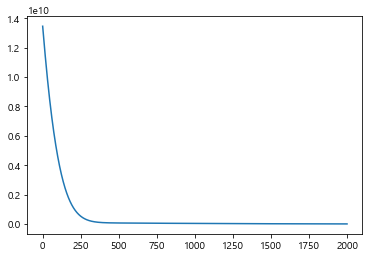

In [29]:
x_train = [1,2,3,4,5,6,7]
y_train = [25000,55000,75000,110000,128000,155000,180000]


model =Sequential()

model.add(Dense(units=1, input_shape=(1,)))
model.compile(loss="mse",optimizer=Adam(lr=100))

result = model.fit(x_train,y_train,epochs=2000)
plt.plot(result.history["loss"])

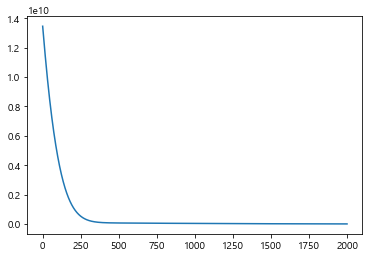

In [30]:
model.get_weights()

result.history.keys()
#print(result.history["loss"])

plt.plot(result.history["loss"])



In [32]:
print("예측값:",model.predict([8]))
model.summary()

예측값: [[203249.19]]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 2) 다중 선형 회귀

In [34]:
x_data =[[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]


X = tf.placeholder(tf.float32,shape=[None,3])
y = tf.placeholder(tf.float32,shape=[None,1])



### 기설 설정 : y =W1*X1 + W2*X2 + W3*X3 + b

W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1])) # 3개가 입력됐을때 출력은 하나 73,80,75 = 152

hypot = tf.matmul(X,W) + b

#### 비용 계산

cost =tf.reduce_mean(tf.square(hypot -y))


#### 최소 비용 계산

train = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = train.minimize(cost)


# 73 80 75 첫 두 셋 시험을 보면 152가 나와야하고... 계속 동일... 3



sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, c, h= sess.run([train,cost,hypot],feed_dict={X:x_data,y:y_data})
    if step % 500 == 0:
        print(step,c,h)

0 851.3376 [[126.47835]
 [153.02483]
 [150.46451]
 [162.16696]
 [118.21131]]
500 0.43317112 [[152.29103]
 [184.18019]
 [181.0938 ]
 [195.53888]
 [141.99303]]
1000 0.4063138 [[152.22981]
 [184.22128]
 [181.07387]
 [195.53351]
 [142.03935]]
1500 0.38508707 [[152.17584]
 [184.25735]
 [181.05617]
 [195.52965]
 [142.0792 ]]
2000 0.36817497 [[152.12827]
 [184.2891 ]
 [181.04044]
 [195.52707]
 [142.11342]]
2500 0.3545581 [[152.08623]
 [184.31702]
 [181.02641]
 [195.52567]
 [142.14273]]
3000 0.34348017 [[152.04907]
 [184.34163]
 [181.0139 ]
 [195.52524]
 [142.16777]]
3500 0.3343649 [[152.01617]
 [184.36331]
 [181.0027 ]
 [195.52563]
 [142.1891 ]]
4000 0.32674894 [[151.98701]
 [184.38248]
 [180.99268]
 [195.5268 ]
 [142.20715]]
4500 0.3202943 [[151.96107]
 [184.3994 ]
 [180.98363]
 [195.52856]
 [142.2224 ]]
5000 0.3147505 [[151.93802]
 [184.41438]
 [180.9755 ]
 [195.53088]
 [142.23517]]
5500 0.3099015 [[151.91743]
 [184.42764]
 [180.96811]
 [195.53368]
 [142.24577]]
6000 0.30560535 [[151.89905]

Epoch 1/2000
5/5 [==============================] - 0s 74ms/step - loss: 38629.4180
Epoch 2/2000
5/5 [==============================] - 0s 598us/step - loss: 37878.7812
Epoch 3/2000
5/5 [==============================] - 0s 599us/step - loss: 37022.1953
Epoch 4/2000
5/5 [==============================] - 0s 997us/step - loss: 36125.6406
Epoch 5/2000
5/5 [==============================] - 0s 1ms/step - loss: 35212.7461
Epoch 6/2000
5/5 [==============================] - 0s 599us/step - loss: 34294.8359
Epoch 7/2000
5/5 [==============================] - 0s 998us/step - loss: 33378.2930
Epoch 8/2000
5/5 [==============================] - 0s 398us/step - loss: 32467.0977
Epoch 9/2000
5/5 [==============================] - 0s 2ms/step - loss: 31563.9023
Epoch 10/2000
5/5 [==============================] - 0s 798us/step - loss: 30670.6055
Epoch 11/2000
5/5 [==============================] - 0s 997us/step - loss: 29788.5938
Epoch 12/2000
5/5 [==============================] - 0s 3ms/step - l

Epoch 98/2000
5/5 [==============================] - 0s 598us/step - loss: 479.6240
Epoch 99/2000
5/5 [==============================] - 0s 598us/step - loss: 448.4338
Epoch 100/2000
5/5 [==============================] - 0s 598us/step - loss: 419.0908
Epoch 101/2000
5/5 [==============================] - 0s 598us/step - loss: 391.5028
Epoch 102/2000
5/5 [==============================] - 0s 798us/step - loss: 365.5805
Epoch 103/2000
5/5 [==============================] - 0s 616us/step - loss: 341.2388
Epoch 104/2000
5/5 [==============================] - 0s 399us/step - loss: 318.3940
Epoch 105/2000
5/5 [==============================] - 0s 813us/step - loss: 296.9689
Epoch 106/2000
5/5 [==============================] - 0s 598us/step - loss: 276.9752
Epoch 107/2000
5/5 [==============================] - 0s 997us/step - loss: 258.2429
Epoch 108/2000
5/5 [==============================] - 0s 2ms/step - loss: 240.7028
Epoch 109/2000
5/5 [==============================] - 0s 798us/step -

Epoch 196/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.4528
Epoch 197/2000
5/5 [==============================] - 0s 798us/step - loss: 14.4518
Epoch 198/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.4510
Epoch 199/2000
5/5 [==============================] - 0s 599us/step - loss: 14.4503
Epoch 200/2000
5/5 [==============================] - 0s 998us/step - loss: 14.4496
Epoch 201/2000
5/5 [==============================] - 0s 796us/step - loss: 14.4490
Epoch 202/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.4484
Epoch 203/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.4479
Epoch 204/2000
5/5 [==============================] - 0s 598us/step - loss: 14.4474
Epoch 205/2000
5/5 [==============================] - 0s 798us/step - loss: 14.4469
Epoch 206/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.4464
Epoch 207/2000
5/5 [==============================] - 0s 599us/step - loss: 14.4459
Ep

Epoch 294/2000
5/5 [==============================] - 0s 598us/step - loss: 14.3853
Epoch 295/2000
5/5 [==============================] - 0s 597us/step - loss: 14.3846
Epoch 296/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.3838
Epoch 297/2000
5/5 [==============================] - 0s 599us/step - loss: 14.3831
Epoch 298/2000
5/5 [==============================] - 0s 598us/step - loss: 14.3823
Epoch 299/2000
5/5 [==============================] - 0s 798us/step - loss: 14.3816
Epoch 300/2000
5/5 [==============================] - 0s 598us/step - loss: 14.3808
Epoch 301/2000
5/5 [==============================] - 0s 798us/step - loss: 14.3800
Epoch 302/2000
5/5 [==============================] - 0s 599us/step - loss: 14.3793
Epoch 303/2000
5/5 [==============================] - 0s 598us/step - loss: 14.3785
Epoch 304/2000
5/5 [==============================] - 0s 598us/step - loss: 14.3778
Epoch 305/2000
5/5 [==============================] - 0s 399us/step - loss: 14

Epoch 392/2000
5/5 [==============================] - 0s 997us/step - loss: 14.3048
Epoch 393/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.3039
Epoch 394/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.3030
Epoch 395/2000
5/5 [==============================] - 0s 596us/step - loss: 14.3021
Epoch 396/2000
5/5 [==============================] - 0s 799us/step - loss: 14.3012
Epoch 397/2000
5/5 [==============================] - 0s 599us/step - loss: 14.3003
Epoch 398/2000
5/5 [==============================] - 0s 598us/step - loss: 14.2994
Epoch 399/2000
5/5 [==============================] - 0s 798us/step - loss: 14.2985
Epoch 400/2000
5/5 [==============================] - 0s 798us/step - loss: 14.2976
Epoch 401/2000
5/5 [==============================] - 0s 598us/step - loss: 14.2967
Epoch 402/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.2958
Epoch 403/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.2949


Epoch 490/2000
5/5 [==============================] - 0s 598us/step - loss: 14.2115
Epoch 491/2000
5/5 [==============================] - 0s 599us/step - loss: 14.2105
Epoch 492/2000
5/5 [==============================] - 0s 399us/step - loss: 14.2095
Epoch 493/2000
5/5 [==============================] - 0s 599us/step - loss: 14.2085
Epoch 494/2000
5/5 [==============================] - 0s 598us/step - loss: 14.2075
Epoch 495/2000
5/5 [==============================] - 0s 798us/step - loss: 14.2064
Epoch 496/2000
5/5 [==============================] - 0s 598us/step - loss: 14.2054
Epoch 497/2000
5/5 [==============================] - 0s 997us/step - loss: 14.2044
Epoch 498/2000
5/5 [==============================] - 0s 598us/step - loss: 14.2034
Epoch 499/2000
5/5 [==============================] - 0s 599us/step - loss: 14.2024
Epoch 500/2000
5/5 [==============================] - 0s 398us/step - loss: 14.2013
Epoch 501/2000
5/5 [==============================] - 0s 399us/step - loss: 

Epoch 588/2000
5/5 [==============================] - 0s 599us/step - loss: 14.1064
Epoch 589/2000
5/5 [==============================] - 0s 399us/step - loss: 14.1053
Epoch 590/2000
5/5 [==============================] - 0s 1ms/step - loss: 14.1041
Epoch 591/2000
5/5 [==============================] - 0s 600us/step - loss: 14.1030
Epoch 592/2000
5/5 [==============================] - 0s 597us/step - loss: 14.1019
Epoch 593/2000
5/5 [==============================] - 0s 997us/step - loss: 14.1008
Epoch 594/2000
5/5 [==============================] - 0s 798us/step - loss: 14.0996
Epoch 595/2000
5/5 [==============================] - 0s 2ms/step - loss: 14.0985
Epoch 596/2000
5/5 [==============================] - 0s 598us/step - loss: 14.0973
Epoch 597/2000
5/5 [==============================] - 0s 599us/step - loss: 14.0962
Epoch 598/2000
5/5 [==============================] - 0s 597us/step - loss: 14.0950
Epoch 599/2000
5/5 [==============================] - 0s 799us/step - loss: 14.0

Epoch 686/2000
5/5 [==============================] - 0s 598us/step - loss: 13.9899
Epoch 687/2000
5/5 [==============================] - 0s 598us/step - loss: 13.9887
Epoch 688/2000
5/5 [==============================] - 0s 598us/step - loss: 13.9875
Epoch 689/2000
5/5 [==============================] - 0s 599us/step - loss: 13.9863
Epoch 690/2000
5/5 [==============================] - 0s 798us/step - loss: 13.9850
Epoch 691/2000
5/5 [==============================] - 0s 997us/step - loss: 13.9838
Epoch 692/2000
5/5 [==============================] - 0s 798us/step - loss: 13.9825
Epoch 693/2000
5/5 [==============================] - 0s 600us/step - loss: 13.9812
Epoch 694/2000
5/5 [==============================] - 0s 598us/step - loss: 13.9800
Epoch 695/2000
5/5 [==============================] - 0s 399us/step - loss: 13.9787
Epoch 696/2000
5/5 [==============================] - 0s 399us/step - loss: 13.9775
Epoch 697/2000
5/5 [==============================] - 0s 997us/step - loss: 

Epoch 784/2000
5/5 [==============================] - 0s 996us/step - loss: 13.8626
Epoch 785/2000
5/5 [==============================] - 0s 798us/step - loss: 13.8612
Epoch 786/2000
5/5 [==============================] - 0s 399us/step - loss: 13.8599
Epoch 787/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.8585
Epoch 788/2000
5/5 [==============================] - 0s 598us/step - loss: 13.8571
Epoch 789/2000
5/5 [==============================] - 0s 798us/step - loss: 13.8558
Epoch 790/2000
5/5 [==============================] - 0s 598us/step - loss: 13.8544
Epoch 791/2000
5/5 [==============================] - 0s 399us/step - loss: 13.8530
Epoch 792/2000
5/5 [==============================] - 0s 598us/step - loss: 13.8517
Epoch 793/2000
5/5 [==============================] - 0s 598us/step - loss: 13.8503
Epoch 794/2000
5/5 [==============================] - 0s 798us/step - loss: 13.8490
Epoch 795/2000
5/5 [==============================] - 0s 399us/step - loss: 13

Epoch 882/2000
5/5 [==============================] - 0s 2ms/step - loss: 13.7245
Epoch 883/2000
5/5 [==============================] - 0s 2ms/step - loss: 13.7230
Epoch 884/2000
5/5 [==============================] - 0s 598us/step - loss: 13.7216
Epoch 885/2000
5/5 [==============================] - 0s 997us/step - loss: 13.7201
Epoch 886/2000
5/5 [==============================] - 0s 399us/step - loss: 13.7186
Epoch 887/2000
5/5 [==============================] - 0s 798us/step - loss: 13.7172
Epoch 888/2000
5/5 [==============================] - 0s 599us/step - loss: 13.7157
Epoch 889/2000
5/5 [==============================] - 0s 798us/step - loss: 13.7142
Epoch 890/2000
5/5 [==============================] - 0s 599us/step - loss: 13.7128
Epoch 891/2000
5/5 [==============================] - 0s 598us/step - loss: 13.7113
Epoch 892/2000
5/5 [==============================] - 0s 598us/step - loss: 13.7098
Epoch 893/2000
5/5 [==============================] - 0s 798us/step - loss: 13.7

Epoch 980/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5760
Epoch 981/2000
5/5 [==============================] - 0s 598us/step - loss: 13.5744
Epoch 982/2000
5/5 [==============================] - 0s 599us/step - loss: 13.5729
Epoch 983/2000
5/5 [==============================] - 0s 798us/step - loss: 13.5713
Epoch 984/2000
5/5 [==============================] - 0s 597us/step - loss: 13.5697
Epoch 985/2000
5/5 [==============================] - 0s 599us/step - loss: 13.5681
Epoch 986/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5665
Epoch 987/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5650
Epoch 988/2000
5/5 [==============================] - 0s 599us/step - loss: 13.5634
Epoch 989/2000
5/5 [==============================] - 0s 598us/step - loss: 13.5618
Epoch 990/2000
5/5 [==============================] - 0s 399us/step - loss: 13.5603
Epoch 991/2000
5/5 [==============================] - 0s 798us/step - loss: 13

Epoch 1077/2000
5/5 [==============================] - 0s 398us/step - loss: 13.4189
Epoch 1078/2000
5/5 [==============================] - 0s 597us/step - loss: 13.4172
Epoch 1079/2000
5/5 [==============================] - 0s 798us/step - loss: 13.4156
Epoch 1080/2000
5/5 [==============================] - 0s 598us/step - loss: 13.4139
Epoch 1081/2000
5/5 [==============================] - 0s 598us/step - loss: 13.4122
Epoch 1082/2000
5/5 [==============================] - 0s 399us/step - loss: 13.4105
Epoch 1083/2000
5/5 [==============================] - 0s 998us/step - loss: 13.4089
Epoch 1084/2000
5/5 [==============================] - 0s 399us/step - loss: 13.4072
Epoch 1085/2000
5/5 [==============================] - 0s 399us/step - loss: 13.4055
Epoch 1086/2000
5/5 [==============================] - 0s 1000us/step - loss: 13.4038
Epoch 1087/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.4021
Epoch 1088/2000
5/5 [==============================] - 0s 399us/st

Epoch 1174/2000
5/5 [==============================] - 0s 599us/step - loss: 13.2519
Epoch 1175/2000
5/5 [==============================] - 0s 795us/step - loss: 13.2501
Epoch 1176/2000
5/5 [==============================] - 0s 399us/step - loss: 13.2483
Epoch 1177/2000
5/5 [==============================] - 0s 798us/step - loss: 13.2465
Epoch 1178/2000
5/5 [==============================] - 0s 596us/step - loss: 13.2448
Epoch 1179/2000
5/5 [==============================] - 0s 399us/step - loss: 13.2430
Epoch 1180/2000
5/5 [==============================] - 0s 399us/step - loss: 13.2412
Epoch 1181/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.2394
Epoch 1182/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.2377
Epoch 1183/2000
5/5 [==============================] - 0s 798us/step - loss: 13.2359
Epoch 1184/2000
5/5 [==============================] - 0s 798us/step - loss: 13.2341
Epoch 1185/2000
5/5 [==============================] - 0s 598us/step 

Epoch 1271/2000
5/5 [==============================] - 0s 599us/step - loss: 13.0751
Epoch 1272/2000
5/5 [==============================] - 0s 798us/step - loss: 13.0732
Epoch 1273/2000
5/5 [==============================] - 0s 598us/step - loss: 13.0714
Epoch 1274/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.0695
Epoch 1275/2000
5/5 [==============================] - 0s 598us/step - loss: 13.0676
Epoch 1276/2000
5/5 [==============================] - 0s 399us/step - loss: 13.0657
Epoch 1277/2000
5/5 [==============================] - 0s 598us/step - loss: 13.0638
Epoch 1278/2000
5/5 [==============================] - 0s 399us/step - loss: 13.0619
Epoch 1279/2000
5/5 [==============================] - 0s 599us/step - loss: 13.0601
Epoch 1280/2000
5/5 [==============================] - 0s 599us/step - loss: 13.0582
Epoch 1281/2000
5/5 [==============================] - 0s 399us/step - loss: 13.0563
Epoch 1282/2000
5/5 [==============================] - 0s 998us/ste

Epoch 1368/2000
5/5 [==============================] - 0s 399us/step - loss: 12.8887
Epoch 1369/2000
5/5 [==============================] - 0s 2ms/step - loss: 12.8867
Epoch 1370/2000
5/5 [==============================] - 0s 798us/step - loss: 12.8847
Epoch 1371/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.8828
Epoch 1372/2000
5/5 [==============================] - 0s 399us/step - loss: 12.8808
Epoch 1373/2000
5/5 [==============================] - 0s 399us/step - loss: 12.8788
Epoch 1374/2000
5/5 [==============================] - 0s 798us/step - loss: 12.8768
Epoch 1375/2000
5/5 [==============================] - 0s 399us/step - loss: 12.8749
Epoch 1376/2000
5/5 [==============================] - 0s 399us/step - loss: 12.8728
Epoch 1377/2000
5/5 [==============================] - 0s 599us/step - loss: 12.8709
Epoch 1378/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.8689
Epoch 1379/2000
5/5 [==============================] - 0s 597us/step - 

Epoch 1465/2000
5/5 [==============================] - 0s 797us/step - loss: 12.6927
Epoch 1466/2000
5/5 [==============================] - 0s 598us/step - loss: 12.6907
Epoch 1467/2000
5/5 [==============================] - 0s 598us/step - loss: 12.6886
Epoch 1468/2000
5/5 [==============================] - 0s 399us/step - loss: 12.6865
Epoch 1469/2000
5/5 [==============================] - 0s 997us/step - loss: 12.6845
Epoch 1470/2000
5/5 [==============================] - 0s 399us/step - loss: 12.6824
Epoch 1471/2000
5/5 [==============================] - 0s 798us/step - loss: 12.6803
Epoch 1472/2000
5/5 [==============================] - 0s 996us/step - loss: 12.6782
Epoch 1473/2000
5/5 [==============================] - 0s 599us/step - loss: 12.6762
Epoch 1474/2000
5/5 [==============================] - 0s 997us/step - loss: 12.6741
Epoch 1475/2000
5/5 [==============================] - 0s 798us/step - loss: 12.6720
Epoch 1476/2000
5/5 [==============================] - 0s 1ms/ste

Epoch 1562/2000
5/5 [==============================] - 0s 598us/step - loss: 12.4874
Epoch 1563/2000
5/5 [==============================] - 0s 599us/step - loss: 12.4853
Epoch 1564/2000
5/5 [==============================] - 0s 598us/step - loss: 12.4832
Epoch 1565/2000
5/5 [==============================] - 0s 599us/step - loss: 12.4809
Epoch 1566/2000
5/5 [==============================] - 0s 399us/step - loss: 12.4788
Epoch 1567/2000
5/5 [==============================] - 0s 598us/step - loss: 12.4766
Epoch 1568/2000
5/5 [==============================] - 0s 798us/step - loss: 12.4745
Epoch 1569/2000
5/5 [==============================] - 0s 598us/step - loss: 12.4723
Epoch 1570/2000
5/5 [==============================] - 0s 399us/step - loss: 12.4701
Epoch 1571/2000
5/5 [==============================] - 0s 798us/step - loss: 12.4679
Epoch 1572/2000
5/5 [==============================] - 0s 399us/step - loss: 12.4657
Epoch 1573/2000
5/5 [==============================] - 0s 599us/s

Epoch 1659/2000
5/5 [==============================] - 0s 597us/step - loss: 12.2729
Epoch 1660/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.2707
Epoch 1661/2000
5/5 [==============================] - 0s 598us/step - loss: 12.2684
Epoch 1662/2000
5/5 [==============================] - 0s 399us/step - loss: 12.2661
Epoch 1663/2000
5/5 [==============================] - 0s 798us/step - loss: 12.2639
Epoch 1664/2000
5/5 [==============================] - 0s 399us/step - loss: 12.2616
Epoch 1665/2000
5/5 [==============================] - 0s 399us/step - loss: 12.2594
Epoch 1666/2000
5/5 [==============================] - 0s 798us/step - loss: 12.2571
Epoch 1667/2000
5/5 [==============================] - 0s 598us/step - loss: 12.2548
Epoch 1668/2000
5/5 [==============================] - 0s 598us/step - loss: 12.2525
Epoch 1669/2000
5/5 [==============================] - 0s 997us/step - loss: 12.2503
Epoch 1670/2000
5/5 [==============================] - 0s 598us/ste

Epoch 1756/2000
5/5 [==============================] - 0s 598us/step - loss: 12.0493
Epoch 1757/2000
5/5 [==============================] - 0s 598us/step - loss: 12.0470
Epoch 1758/2000
5/5 [==============================] - 0s 398us/step - loss: 12.0446
Epoch 1759/2000
5/5 [==============================] - 0s 399us/step - loss: 12.0422
Epoch 1760/2000
5/5 [==============================] - 0s 598us/step - loss: 12.0399
Epoch 1761/2000
5/5 [==============================] - 0s 599us/step - loss: 12.0375
Epoch 1762/2000
5/5 [==============================] - 0s 399us/step - loss: 12.0352
Epoch 1763/2000
5/5 [==============================] - 0s 598us/step - loss: 12.0328
Epoch 1764/2000
5/5 [==============================] - 0s 598us/step - loss: 12.0305
Epoch 1765/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.0281
Epoch 1766/2000
5/5 [==============================] - 0s 599us/step - loss: 12.0258
Epoch 1767/2000
5/5 [==============================] - 0s 598us/ste

Epoch 1853/2000
5/5 [==============================] - 0s 599us/step - loss: 11.8168
Epoch 1854/2000
5/5 [==============================] - 0s 399us/step - loss: 11.8144
Epoch 1855/2000
5/5 [==============================] - 0s 601us/step - loss: 11.8119
Epoch 1856/2000
5/5 [==============================] - 0s 598us/step - loss: 11.8095
Epoch 1857/2000
5/5 [==============================] - 0s 398us/step - loss: 11.8070
Epoch 1858/2000
5/5 [==============================] - 0s 599us/step - loss: 11.8046
Epoch 1859/2000
5/5 [==============================] - 0s 598us/step - loss: 11.8022
Epoch 1860/2000
5/5 [==============================] - 0s 3ms/step - loss: 11.7997
Epoch 1861/2000
5/5 [==============================] - 0s 598us/step - loss: 11.7972
Epoch 1862/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.7948
Epoch 1863/2000
5/5 [==============================] - 0s 598us/step - loss: 11.7923
Epoch 1864/2000
5/5 [==============================] - 0s 798us/step 

Epoch 1950/2000
5/5 [==============================] - 0s 598us/step - loss: 11.5756
Epoch 1951/2000
5/5 [==============================] - 0s 798us/step - loss: 11.5731
Epoch 1952/2000
5/5 [==============================] - 0s 599us/step - loss: 11.5706
Epoch 1953/2000
5/5 [==============================] - 0s 599us/step - loss: 11.5680
Epoch 1954/2000
5/5 [==============================] - 0s 798us/step - loss: 11.5655
Epoch 1955/2000
5/5 [==============================] - 0s 599us/step - loss: 11.5630
Epoch 1956/2000
5/5 [==============================] - 0s 798us/step - loss: 11.5604
Epoch 1957/2000
5/5 [==============================] - 0s 598us/step - loss: 11.5579
Epoch 1958/2000
5/5 [==============================] - 0s 598us/step - loss: 11.5553
Epoch 1959/2000
5/5 [==============================] - 0s 399us/step - loss: 11.5528
Epoch 1960/2000
5/5 [==============================] - 0s 1ms/step - loss: 11.5503
Epoch 1961/2000
5/5 [==============================] - 0s 798us/ste

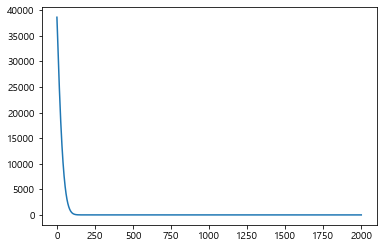

In [49]:
x_train =np.array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

y_train = np.array([[152.], [185.], [180.], [196.], [142.]])


model =Sequential()

model.add(Dense(units=1, input_shape=(3,)))
# model.compile(loss="mse",optimizer=SGD(lr=1e-7))
model.compile(loss="mse",optimizer=Adam(lr=0.01))

result = model.fit(x_train,y_train,epochs=2000)
plt.plot(result.history["loss"])

In [54]:
#print(model.predict(x_train))

print(model.predict(np.array([[73.,80.,75.]]))) # 2차원부터는 배열로 바꿔줘야함.

[[155.61473]]


# 3)체중과 나이에 따른 혈당 예측

+ 체중이 100이고 나이가 40일때 혈당은 얼마냐?

In [59]:
np.random.seed(7)

data = np.genfromtxt("data1/x09.txt",skip_header=36)

data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [64]:
X = np.array(data[:,2:4],dtype=np.float32)
y = np.array(data[:,4],dtype=np.float32)

model = Sequential([Dense(1,input_shape=(2,))])
#model.compile(loss="mse",optimizer=Adam(lr=0.01))
#model.compile(loss="mse",optimizer=SGD(lr=1e-6))
model.compile(loss="mse",optimizer=RMSprop(lr=0.01))
result = model.fit(X,y,epochs=2000)


Epoch 1/2000
25/25 [==============================] - 0s 12ms/step - loss: 107903.9297
Epoch 2/2000
25/25 [==============================] - 0s 80us/step - loss: 105644.3125
Epoch 3/2000
25/25 [==============================] - 0s 160us/step - loss: 104028.6172
Epoch 4/2000
25/25 [==============================] - 0s 119us/step - loss: 102689.7031
Epoch 5/2000
25/25 [==============================] - 0s 239us/step - loss: 101511.3125
Epoch 6/2000
25/25 [==============================] - 0s 160us/step - loss: 100439.5938
Epoch 7/2000
25/25 [==============================] - 0s 239us/step - loss: 99444.5781
Epoch 8/2000
25/25 [==============================] - 0s 200us/step - loss: 98507.6406
Epoch 9/2000
25/25 [==============================] - 0s 120us/step - loss: 97616.3281
Epoch 10/2000
25/25 [==============================] - 0s 240us/step - loss: 96761.8438
Epoch 11/2000
25/25 [==============================] - 0s 120us/step - loss: 95937.7188
Epoch 12/2000
25/25 [================

Epoch 95/2000
25/25 [==============================] - 0s 160us/step - loss: 48273.5195
Epoch 96/2000
25/25 [==============================] - 0s 120us/step - loss: 47821.0000
Epoch 97/2000
25/25 [==============================] - 0s 160us/step - loss: 47370.8047
Epoch 98/2000
25/25 [==============================] - 0s 160us/step - loss: 46922.9492
Epoch 99/2000
25/25 [==============================] - 0s 80us/step - loss: 46477.4219
Epoch 100/2000
25/25 [==============================] - 0s 120us/step - loss: 46034.2109
Epoch 101/2000
25/25 [==============================] - 0s 120us/step - loss: 45593.3359
Epoch 102/2000
25/25 [==============================] - 0s 200us/step - loss: 45154.7852
Epoch 103/2000
25/25 [==============================] - 0s 120us/step - loss: 44718.5664
Epoch 104/2000
25/25 [==============================] - 0s 120us/step - loss: 44284.6719
Epoch 105/2000
25/25 [==============================] - 0s 120us/step - loss: 43853.0938
Epoch 106/2000
25/25 [=====

Epoch 188/2000
25/25 [==============================] - 0s 160us/step - loss: 16060.7334
Epoch 189/2000
25/25 [==============================] - 0s 239us/step - loss: 15821.4287
Epoch 190/2000
25/25 [==============================] - 0s 120us/step - loss: 15584.3672
Epoch 191/2000
25/25 [==============================] - 0s 199us/step - loss: 15349.5371
Epoch 192/2000
25/25 [==============================] - 0s 120us/step - loss: 15116.9453
Epoch 193/2000
25/25 [==============================] - 0s 320us/step - loss: 14886.5840
Epoch 194/2000
25/25 [==============================] - 0s 120us/step - loss: 14658.4541
Epoch 195/2000
25/25 [==============================] - 0s 319us/step - loss: 14432.5547
Epoch 196/2000
25/25 [==============================] - 0s 181us/step - loss: 14208.8789
Epoch 197/2000
25/25 [==============================] - 0s 200us/step - loss: 13987.4336
Epoch 198/2000
25/25 [==============================] - 0s 160us/step - loss: 13768.2061
Epoch 199/2000
25/25 

Epoch 281/2000
25/25 [==============================] - 0s 199us/step - loss: 3008.1887
Epoch 282/2000
25/25 [==============================] - 0s 200us/step - loss: 2961.6252
Epoch 283/2000
25/25 [==============================] - 0s 80us/step - loss: 2916.7625
Epoch 284/2000
25/25 [==============================] - 0s 80us/step - loss: 2873.5835
Epoch 285/2000
25/25 [==============================] - 0s 199us/step - loss: 2832.0706
Epoch 286/2000
25/25 [==============================] - 0s 80us/step - loss: 2792.2041
Epoch 287/2000
25/25 [==============================] - 0s 160us/step - loss: 2753.9639
Epoch 288/2000
25/25 [==============================] - 0s 159us/step - loss: 2717.3289
Epoch 289/2000
25/25 [==============================] - 0s 120us/step - loss: 2682.2776
Epoch 290/2000
25/25 [==============================] - 0s 120us/step - loss: 2648.7878
Epoch 291/2000
25/25 [==============================] - 0s 120us/step - loss: 2616.8340
Epoch 292/2000
25/25 [=============

Epoch 375/2000
25/25 [==============================] - 0s 120us/step - loss: 2045.2554
Epoch 376/2000
25/25 [==============================] - 0s 120us/step - loss: 2042.1003
Epoch 377/2000
25/25 [==============================] - 0s 160us/step - loss: 2038.9736
Epoch 378/2000
25/25 [==============================] - 0s 120us/step - loss: 2035.8757
Epoch 379/2000
25/25 [==============================] - 0s 120us/step - loss: 2032.8068
Epoch 380/2000
25/25 [==============================] - 0s 120us/step - loss: 2029.7675
Epoch 381/2000
25/25 [==============================] - 0s 80us/step - loss: 2026.7574
Epoch 382/2000
25/25 [==============================] - 0s 120us/step - loss: 2023.7777
Epoch 383/2000
25/25 [==============================] - 0s 199us/step - loss: 2020.8285
Epoch 384/2000
25/25 [==============================] - 0s 80us/step - loss: 2017.9095
Epoch 385/2000
25/25 [==============================] - 0s 120us/step - loss: 2015.0212
Epoch 386/2000
25/25 [============

Epoch 469/2000
25/25 [==============================] - 0s 160us/step - loss: 1876.5826
Epoch 470/2000
25/25 [==============================] - 0s 160us/step - loss: 1875.9777
Epoch 471/2000
25/25 [==============================] - 0s 160us/step - loss: 1875.4222
Epoch 472/2000
25/25 [==============================] - 0s 200us/step - loss: 1874.8605
Epoch 473/2000
25/25 [==============================] - 0s 120us/step - loss: 1874.3439
Epoch 474/2000
25/25 [==============================] - 0s 120us/step - loss: 1873.8282
Epoch 475/2000
25/25 [==============================] - 0s 199us/step - loss: 1873.3553
Epoch 476/2000
25/25 [==============================] - 0s 120us/step - loss: 1872.8846
Epoch 477/2000
25/25 [==============================] - 0s 80us/step - loss: 1872.4567
Epoch 478/2000
25/25 [==============================] - 0s 280us/step - loss: 1872.0291
Epoch 479/2000
25/25 [==============================] - 0s 160us/step - loss: 1871.6450
Epoch 480/2000
25/25 [===========

Epoch 563/2000
25/25 [==============================] - 0s 160us/step - loss: 1862.8623
Epoch 564/2000
25/25 [==============================] - 0s 160us/step - loss: 1862.8213
Epoch 565/2000
25/25 [==============================] - 0s 120us/step - loss: 1862.7823
Epoch 566/2000
25/25 [==============================] - 0s 120us/step - loss: 1862.7411
Epoch 567/2000
25/25 [==============================] - 0s 120us/step - loss: 1862.7025
Epoch 568/2000
25/25 [==============================] - 0s 199us/step - loss: 1862.6611
Epoch 569/2000
25/25 [==============================] - 0s 199us/step - loss: 1862.6215
Epoch 570/2000
25/25 [==============================] - 0s 80us/step - loss: 1862.5803
Epoch 571/2000
25/25 [==============================] - 0s 120us/step - loss: 1862.5411
Epoch 572/2000
25/25 [==============================] - 0s 120us/step - loss: 1862.5001
Epoch 573/2000
25/25 [==============================] - 0s 80us/step - loss: 1862.4613
Epoch 574/2000
25/25 [============

Epoch 657/2000
25/25 [==============================] - 0s 160us/step - loss: 1859.1444
Epoch 658/2000
25/25 [==============================] - 0s 239us/step - loss: 1859.1038
Epoch 659/2000
25/25 [==============================] - 0s 279us/step - loss: 1859.0660
Epoch 660/2000
25/25 [==============================] - 0s 120us/step - loss: 1859.0255
Epoch 661/2000
25/25 [==============================] - 0s 240us/step - loss: 1858.9875
Epoch 662/2000
25/25 [==============================] - 0s 120us/step - loss: 1858.9476
Epoch 663/2000
25/25 [==============================] - 0s 200us/step - loss: 1858.9092
Epoch 664/2000
25/25 [==============================] - 0s 160us/step - loss: 1858.8690
Epoch 665/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.8304
Epoch 666/2000
25/25 [==============================] - 0s 199us/step - loss: 1858.7909
Epoch 667/2000
25/25 [==============================] - 0s 120us/step - loss: 1858.7528
Epoch 668/2000
25/25 [===========

Epoch 751/2000
25/25 [==============================] - 0s 93us/step - loss: 1855.4838
Epoch 752/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.4441
Epoch 753/2000
25/25 [==============================] - 0s 160us/step - loss: 1855.4066
Epoch 754/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.3668
Epoch 755/2000
25/25 [==============================] - 0s 160us/step - loss: 1855.3289
Epoch 756/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.2897
Epoch 757/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.2521
Epoch 758/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.2122
Epoch 759/2000
25/25 [==============================] - 0s 79us/step - loss: 1855.1750
Epoch 760/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.1350
Epoch 761/2000
25/25 [==============================] - 0s 120us/step - loss: 1855.0972
Epoch 762/2000
25/25 [============

Epoch 845/2000
25/25 [==============================] - 0s 160us/step - loss: 1851.8728
Epoch 846/2000
25/25 [==============================] - 0s 120us/step - loss: 1851.8336
Epoch 847/2000
25/25 [==============================] - 0s 200us/step - loss: 1851.7968
Epoch 848/2000
25/25 [==============================] - 0s 120us/step - loss: 1851.7574
Epoch 849/2000
25/25 [==============================] - 0s 120us/step - loss: 1851.7203
Epoch 850/2000
25/25 [==============================] - 0s 199us/step - loss: 1851.6814
Epoch 851/2000
25/25 [==============================] - 0s 120us/step - loss: 1851.6445
Epoch 852/2000
25/25 [==============================] - 0s 160us/step - loss: 1851.6050
Epoch 853/2000
25/25 [==============================] - 0s 159us/step - loss: 1851.5682
Epoch 854/2000
25/25 [==============================] - 0s 199us/step - loss: 1851.5288
Epoch 855/2000
25/25 [==============================] - 0s 199us/step - loss: 1851.4917
Epoch 856/2000
25/25 [==========

Epoch 939/2000
25/25 [==============================] - 0s 120us/step - loss: 1848.3118
Epoch 940/2000
25/25 [==============================] - 0s 120us/step - loss: 1848.2729
Epoch 941/2000
25/25 [==============================] - 0s 199us/step - loss: 1848.2362
Epoch 942/2000
25/25 [==============================] - 0s 279us/step - loss: 1848.1978
Epoch 943/2000
25/25 [==============================] - 0s 160us/step - loss: 1848.1609
Epoch 944/2000
25/25 [==============================] - 0s 100us/step - loss: 1848.1223
Epoch 945/2000
25/25 [==============================] - 0s 199us/step - loss: 1848.0863
Epoch 946/2000
25/25 [==============================] - 0s 239us/step - loss: 1848.0475
Epoch 947/2000
25/25 [==============================] - 0s 120us/step - loss: 1848.0101
Epoch 948/2000
25/25 [==============================] - 0s 239us/step - loss: 1847.9725
Epoch 949/2000
25/25 [==============================] - 0s 120us/step - loss: 1847.9359
Epoch 950/2000
25/25 [==========

Epoch 1032/2000
25/25 [==============================] - 0s 80us/step - loss: 1844.8367
Epoch 1033/2000
25/25 [==============================] - 0s 80us/step - loss: 1844.8003
Epoch 1034/2000
25/25 [==============================] - 0s 119us/step - loss: 1844.7625
Epoch 1035/2000
25/25 [==============================] - 0s 120us/step - loss: 1844.7261
Epoch 1036/2000
25/25 [==============================] - 0s 160us/step - loss: 1844.6880
Epoch 1037/2000
25/25 [==============================] - 0s 119us/step - loss: 1844.6520
Epoch 1038/2000
25/25 [==============================] - 0s 159us/step - loss: 1844.6138
Epoch 1039/2000
25/25 [==============================] - 0s 120us/step - loss: 1844.5771
Epoch 1040/2000
25/25 [==============================] - 0s 160us/step - loss: 1844.5394
Epoch 1041/2000
25/25 [==============================] - 0s 319us/step - loss: 1844.5034
Epoch 1042/2000
25/25 [==============================] - 0s 120us/step - loss: 1844.4656
Epoch 1043/2000
25/25 [

Epoch 1125/2000
25/25 [==============================] - 0s 80us/step - loss: 1841.4117
Epoch 1126/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.3738
Epoch 1127/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.3381
Epoch 1128/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.3007
Epoch 1129/2000
25/25 [==============================] - 0s 160us/step - loss: 1841.2655
Epoch 1130/2000
25/25 [==============================] - 0s 80us/step - loss: 1841.2277
Epoch 1131/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.1919
Epoch 1132/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.1544
Epoch 1133/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.1189
Epoch 1134/2000
25/25 [==============================] - 0s 120us/step - loss: 1841.0813
Epoch 1135/2000
25/25 [==============================] - 0s 80us/step - loss: 1841.0457
Epoch 1136/2000
25/25 [=

Epoch 1218/2000
25/25 [==============================] - 0s 120us/step - loss: 1838.0334
Epoch 1219/2000
25/25 [==============================] - 0s 80us/step - loss: 1837.9988
Epoch 1220/2000
25/25 [==============================] - 0s 200us/step - loss: 1837.9614
Epoch 1221/2000
25/25 [==============================] - 0s 160us/step - loss: 1837.9259
Epoch 1222/2000
25/25 [==============================] - 0s 119us/step - loss: 1837.8892
Epoch 1223/2000
25/25 [==============================] - 0s 120us/step - loss: 1837.8540
Epoch 1224/2000
25/25 [==============================] - 0s 120us/step - loss: 1837.8168
Epoch 1225/2000
25/25 [==============================] - 0s 120us/step - loss: 1837.7820
Epoch 1226/2000
25/25 [==============================] - 0s 120us/step - loss: 1837.7450
Epoch 1227/2000
25/25 [==============================] - 0s 120us/step - loss: 1837.7097
Epoch 1228/2000
25/25 [==============================] - 0s 160us/step - loss: 1837.6736
Epoch 1229/2000
25/25 

Epoch 1311/2000
25/25 [==============================] - 0s 200us/step - loss: 1834.7061
Epoch 1312/2000
25/25 [==============================] - 0s 239us/step - loss: 1834.6689
Epoch 1313/2000
25/25 [==============================] - 0s 120us/step - loss: 1834.6345
Epoch 1314/2000
25/25 [==============================] - 0s 120us/step - loss: 1834.5981
Epoch 1315/2000
25/25 [==============================] - 0s 80us/step - loss: 1834.5635
Epoch 1316/2000
25/25 [==============================] - 0s 120us/step - loss: 1834.5272
Epoch 1317/2000
25/25 [==============================] - 0s 239us/step - loss: 1834.4926
Epoch 1318/2000
25/25 [==============================] - 0s 200us/step - loss: 1834.4561
Epoch 1319/2000
25/25 [==============================] - 0s 159us/step - loss: 1834.4214
Epoch 1320/2000
25/25 [==============================] - 0s 120us/step - loss: 1834.3856
Epoch 1321/2000
25/25 [==============================] - 0s 80us/step - loss: 1834.3508
Epoch 1322/2000
25/25 [

Epoch 1404/2000
25/25 [==============================] - 0s 80us/step - loss: 1831.4247
Epoch 1405/2000
25/25 [==============================] - 0s 160us/step - loss: 1831.3907
Epoch 1406/2000
25/25 [==============================] - 0s 80us/step - loss: 1831.3544
Epoch 1407/2000
25/25 [==============================] - 0s 80us/step - loss: 1831.3207
Epoch 1408/2000
25/25 [==============================] - 0s 200us/step - loss: 1831.2844
Epoch 1409/2000
25/25 [==============================] - 0s 239us/step - loss: 1831.2507
Epoch 1410/2000
25/25 [==============================] - 0s 120us/step - loss: 1831.2148
Epoch 1411/2000
25/25 [==============================] - 0s 80us/step - loss: 1831.1807
Epoch 1412/2000
25/25 [==============================] - 0s 120us/step - loss: 1831.1445
Epoch 1413/2000
25/25 [==============================] - 0s 79us/step - loss: 1831.1108
Epoch 1414/2000
25/25 [==============================] - 0s 160us/step - loss: 1831.0750
Epoch 1415/2000
25/25 [===

Epoch 1497/2000
25/25 [==============================] - 0s 120us/step - loss: 1828.1946
Epoch 1498/2000
25/25 [==============================] - 0s 120us/step - loss: 1828.1587
Epoch 1499/2000
25/25 [==============================] - 0s 279us/step - loss: 1828.1254
Epoch 1500/2000
25/25 [==============================] - 0s 80us/step - loss: 1828.0895
Epoch 1501/2000
25/25 [==============================] - 0s 160us/step - loss: 1828.0565
Epoch 1502/2000
25/25 [==============================] - 0s 160us/step - loss: 1828.0203
Epoch 1503/2000
25/25 [==============================] - 0s 80us/step - loss: 1827.9872
Epoch 1504/2000
25/25 [==============================] - 0s 120us/step - loss: 1827.9519
Epoch 1505/2000
25/25 [==============================] - 0s 279us/step - loss: 1827.9185
Epoch 1506/2000
25/25 [==============================] - 0s 120us/step - loss: 1827.8828
Epoch 1507/2000
25/25 [==============================] - 0s 160us/step - loss: 1827.8499
Epoch 1508/2000
25/25 [

Epoch 1590/2000
25/25 [==============================] - 0s 120us/step - loss: 1825.0101
Epoch 1591/2000
25/25 [==============================] - 0s 120us/step - loss: 1824.9773
Epoch 1592/2000
25/25 [==============================] - 0s 120us/step - loss: 1824.9421
Epoch 1593/2000
25/25 [==============================] - 0s 120us/step - loss: 1824.9095
Epoch 1594/2000
25/25 [==============================] - 0s 119us/step - loss: 1824.8745
Epoch 1595/2000
25/25 [==============================] - 0s 120us/step - loss: 1824.8414
Epoch 1596/2000
25/25 [==============================] - 0s 200us/step - loss: 1824.8065
Epoch 1597/2000
25/25 [==============================] - 0s 120us/step - loss: 1824.7734
Epoch 1598/2000
25/25 [==============================] - 0s 120us/step - loss: 1824.7386
Epoch 1599/2000
25/25 [==============================] - 0s 80us/step - loss: 1824.7053
Epoch 1600/2000
25/25 [==============================] - 0s 160us/step - loss: 1824.6702
Epoch 1601/2000
25/25 

Epoch 1683/2000
25/25 [==============================] - 0s 120us/step - loss: 1821.8771
Epoch 1684/2000
25/25 [==============================] - 0s 120us/step - loss: 1821.8422
Epoch 1685/2000
25/25 [==============================] - 0s 120us/step - loss: 1821.8098
Epoch 1686/2000
25/25 [==============================] - 0s 159us/step - loss: 1821.7751
Epoch 1687/2000
25/25 [==============================] - 0s 80us/step - loss: 1821.7426
Epoch 1688/2000
25/25 [==============================] - 0s 120us/step - loss: 1821.7086
Epoch 1689/2000
25/25 [==============================] - 0s 160us/step - loss: 1821.6758
Epoch 1690/2000
25/25 [==============================] - 0s 80us/step - loss: 1821.6417
Epoch 1691/2000
25/25 [==============================] - 0s 159us/step - loss: 1821.6094
Epoch 1692/2000
25/25 [==============================] - 0s 160us/step - loss: 1821.5746
Epoch 1693/2000
25/25 [==============================] - 0s 120us/step - loss: 1821.5422
Epoch 1694/2000
25/25 [

Epoch 1776/2000
25/25 [==============================] - 0s 160us/step - loss: 1818.7898
Epoch 1777/2000
25/25 [==============================] - 0s 319us/step - loss: 1818.7578
Epoch 1778/2000
25/25 [==============================] - 0s 80us/step - loss: 1818.7236
Epoch 1779/2000
25/25 [==============================] - 0s 160us/step - loss: 1818.6918
Epoch 1780/2000
25/25 [==============================] - 0s 160us/step - loss: 1818.6583
Epoch 1781/2000
25/25 [==============================] - 0s 160us/step - loss: 1818.6262
Epoch 1782/2000
25/25 [==============================] - 0s 199us/step - loss: 1818.5923
Epoch 1783/2000
25/25 [==============================] - 0s 120us/step - loss: 1818.5601
Epoch 1784/2000
25/25 [==============================] - 0s 120us/step - loss: 1818.5269
Epoch 1785/2000
25/25 [==============================] - 0s 80us/step - loss: 1818.4945
Epoch 1786/2000
25/25 [==============================] - 0s 160us/step - loss: 1818.4609
Epoch 1787/2000
25/25 [

Epoch 1869/2000
25/25 [==============================] - 0s 80us/step - loss: 1815.7534
Epoch 1870/2000
25/25 [==============================] - 0s 199us/step - loss: 1815.7197
Epoch 1871/2000
25/25 [==============================] - 0s 120us/step - loss: 1815.6882
Epoch 1872/2000
25/25 [==============================] - 0s 120us/step - loss: 1815.6547
Epoch 1873/2000
25/25 [==============================] - 0s 160us/step - loss: 1815.6235
Epoch 1874/2000
25/25 [==============================] - 0s 80us/step - loss: 1815.5902
Epoch 1875/2000
25/25 [==============================] - 0s 119us/step - loss: 1815.5585
Epoch 1876/2000
25/25 [==============================] - 0s 120us/step - loss: 1815.5258
Epoch 1877/2000
25/25 [==============================] - 0s 160us/step - loss: 1815.4943
Epoch 1878/2000
25/25 [==============================] - 0s 120us/step - loss: 1815.4609
Epoch 1879/2000
25/25 [==============================] - 0s 80us/step - loss: 1815.4296
Epoch 1880/2000
25/25 [=

Epoch 1962/2000
25/25 [==============================] - 0s 80us/step - loss: 1812.7633
Epoch 1963/2000
25/25 [==============================] - 0s 80us/step - loss: 1812.7323
Epoch 1964/2000
25/25 [==============================] - 0s 160us/step - loss: 1812.6992
Epoch 1965/2000
25/25 [==============================] - 0s 120us/step - loss: 1812.6683
Epoch 1966/2000
25/25 [==============================] - 0s 80us/step - loss: 1812.6357
Epoch 1967/2000
25/25 [==============================] - 0s 120us/step - loss: 1812.6050
Epoch 1968/2000
25/25 [==============================] - 0s 80us/step - loss: 1812.5719
Epoch 1969/2000
25/25 [==============================] - 0s 80us/step - loss: 1812.5411
Epoch 1970/2000
25/25 [==============================] - 0s 120us/step - loss: 1812.5083
Epoch 1971/2000
25/25 [==============================] - 0s 199us/step - loss: 1812.4775
Epoch 1972/2000
25/25 [==============================] - 0s 80us/step - loss: 1812.4446
Epoch 1973/2000
25/25 [====

예측값: [[348.7672]]


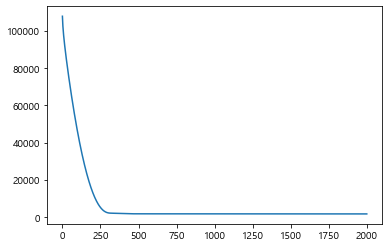

In [65]:
plt.plot(result.history["loss"])
print("예측값:",model.predict(np.array([[100,40]])))

# 4) Boston Housing Sample

# 딥러닝 기초에 히든계층 엄청 간단히 해주는것 

In [66]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test,y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [67]:
print(X_train.shape,X_test.shape)

(404, 13) (102, 13)


In [70]:
#### 정규화

mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis = 0)

X_train /= std
X_test -= mean
X_test /= std

In [71]:
# deep & wide : 3개의 레이어,64개의 입출력 갯수 

model =Sequential()

model.add(Dense(64, input_shape=(13,),activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.compile(loss="mse",optimizer="rmsprop", metrics=["mae"])
model.fit(X_train,y_train, epochs=100, batch_size=1)

Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 172.8603 - mae: 9.5303
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 25.2727 - mae: 3.3010
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 19.1315 - mae: 2.8337
Epoch 4/100
404/404 [==============================] - 1s 3ms/step - loss: 17.5965 - mae: 2.6746
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 15.0853 - mae: 2.5416
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 14.3244 - mae: 2.4056
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 13.4404 - mae: 2.4088
Epoch 8/100
404/404 [==============================] - 1s 2ms/step - loss: 13.2704 - mae: 2.3767
Epoch 9/100
404/404 [==============================] - 1s 2ms/step - loss: 12.0239 - mae: 2.3176
Epoch 10/100
404/404 [==============================] - 1s 2ms/step - loss: 11.6018 - mae: 2.3392
Epoch 11/100
404/404 [======

In [69]:
model.summary()
mse,mae = model.evaluate(X_test,y_test)
print(mse,mae) # 오차값 3.5315

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
102/102 [==============================] - 0s 1ms/step
27.815197215360755 3.531522035598755


In [72]:
# 정규화를 했을때
mse,mae = model.evaluate(X_test,y_test)
print(mse,mae) #14.46 / 2.3으로 확떨어짐

102/102 [==============================] - 0s 1ms/step
14.463996438419118 2.3438353538513184


# 3) 분류 알고리즘

### 1) Tensorflow 를 이용한 로지스틱 회귀

In [73]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32,shape=[None,2])
y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))



# 가설
hypot = tf.sigmoid(tf.matmul(X,W)+ b)


# 비용

cost = -tf.reduce_mean(y * tf.math.log(hypot) + (1 - y) * tf.math.log(1 - hypot))

# 최소비용

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(15000):
    _, h=sess.run([train,hypot], feed_dict={X:x_data, y:y_data})
    
    if step%200 == 0:
        print(step,h)

preds = tf.cast(hypot>0.5, dtype=tf.float32)

sess.run(preds,feed_dict={X:x_data, y:y_data})

accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y),dtype=tf.float32))

h, p, a=sess.run([hypot,preds,accuracy],feed_dict={X:x_data,y:y_data})
print(h)
print(p)
print(a)

0 [[0.05231257]
 [0.0135797 ]
 [0.04683541]
 [0.005022  ]
 [0.00304688]
 [0.00447282]]
200 [[0.30067867]
 [0.33806756]
 [0.6841377 ]
 [0.62733406]
 [0.7534604 ]
 [0.8945155 ]]
400 [[0.25721335]
 [0.29840598]
 [0.6891244 ]
 [0.6271143 ]
 [0.76980937]
 [0.915009  ]]
600 [[0.22661898]
 [0.27251846]
 [0.687777  ]
 [0.6287123 ]
 [0.7826175 ]
 [0.92716575]]
800 [[0.20395283]
 [0.25499552]
 [0.6825157 ]
 [0.63158524]
 [0.79324675]
 [0.9349995 ]]
1000 [[0.18637383]
 [0.24270745]
 [0.67463845]
 [0.63521767]
 [0.8023341 ]
 [0.94034415]]
1200 [[0.17221403]
 [0.23383406]
 [0.6649846 ]
 [0.63932484]
 [0.81031317]
 [0.9441724 ]]
1400 [[0.16044371]
 [0.22725607]
 [0.65412396]
 [0.64373237]
 [0.8174755 ]
 [0.94703716]]
1600 [[0.15040073]
 [0.2222538 ]
 [0.6424589 ]
 [0.64832467]
 [0.8240187 ]
 [0.9492711 ]]
1800 [[0.14164545]
 [0.21834876]
 [0.6302832 ]
 [0.65302205]
 [0.8300783 ]
 [0.95108277]]
2000 [[0.13387734]
 [0.21521349]
 [0.6178136 ]
 [0.6577658 ]
 [0.83574736]
 [0.9526073 ]]
2200 [[0.12688655

In [79]:
# 위의 코드를 keras로 

x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_data = np.array([[0], [0], [0], [1], [1], [1]])

model = Sequential()

model.add(Dense(1, input_dim=2, activation="sigmoid")) #활성화

model.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.01),metrics=["binary_accuracy"])

model.fit(x_data, y_data, epochs=500)


Epoch 1/500
6/6 [==============================] - 0s 51ms/step - loss: 1.9957 - binary_accuracy: 0.5000
Epoch 2/500
6/6 [==============================] - 0s 333us/step - loss: 1.9713 - binary_accuracy: 0.5000
Epoch 3/500
6/6 [==============================] - 0s 333us/step - loss: 1.9469 - binary_accuracy: 0.5000
Epoch 4/500
6/6 [==============================] - 0s 499us/step - loss: 1.9225 - binary_accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 665us/step - loss: 1.8982 - binary_accuracy: 0.5000
Epoch 6/500
6/6 [==============================] - 0s 499us/step - loss: 1.8739 - binary_accuracy: 0.5000
Epoch 7/500
6/6 [==============================] - 0s 498us/step - loss: 1.8497 - binary_accuracy: 0.5000
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 1.8255 - binary_accuracy: 0.5000
Epoch 9/500
6/6 [==============================] - 0s 665us/step - loss: 1.8013 - binary_accuracy: 0.5000
Epoch 10/500
6/6 [==============================]

Epoch 78/500
6/6 [==============================] - 0s 499us/step - loss: 0.5727 - binary_accuracy: 0.5000
Epoch 79/500
6/6 [==============================] - 0s 499us/step - loss: 0.5680 - binary_accuracy: 0.5000
Epoch 80/500
6/6 [==============================] - 0s 499us/step - loss: 0.5637 - binary_accuracy: 0.5000
Epoch 81/500
6/6 [==============================] - 0s 831us/step - loss: 0.5598 - binary_accuracy: 0.5000
Epoch 82/500
6/6 [==============================] - 0s 752us/step - loss: 0.5562 - binary_accuracy: 0.5000
Epoch 83/500
6/6 [==============================] - 0s 499us/step - loss: 0.5530 - binary_accuracy: 0.5000
Epoch 84/500
6/6 [==============================] - 0s 499us/step - loss: 0.5501 - binary_accuracy: 0.5000
Epoch 85/500
6/6 [==============================] - 0s 499us/step - loss: 0.5474 - binary_accuracy: 0.6667
Epoch 86/500
6/6 [==============================] - 0s 499us/step - loss: 0.5450 - binary_accuracy: 0.6667
Epoch 87/500
6/6 [===================

Epoch 155/500
6/6 [==============================] - 0s 499us/step - loss: 0.4728 - binary_accuracy: 0.8333
Epoch 156/500
6/6 [==============================] - 0s 997us/step - loss: 0.4720 - binary_accuracy: 0.8333
Epoch 157/500
6/6 [==============================] - 0s 665us/step - loss: 0.4711 - binary_accuracy: 0.8333
Epoch 158/500
6/6 [==============================] - 0s 499us/step - loss: 0.4703 - binary_accuracy: 0.8333
Epoch 159/500
6/6 [==============================] - 0s 499us/step - loss: 0.4694 - binary_accuracy: 0.8333
Epoch 160/500
6/6 [==============================] - 0s 665us/step - loss: 0.4685 - binary_accuracy: 0.8333
Epoch 161/500
6/6 [==============================] - 0s 498us/step - loss: 0.4677 - binary_accuracy: 0.8333
Epoch 162/500
6/6 [==============================] - 0s 665us/step - loss: 0.4668 - binary_accuracy: 0.8333
Epoch 163/500
6/6 [==============================] - 0s 997us/step - loss: 0.4660 - binary_accuracy: 0.8333
Epoch 164/500
6/6 [=========

Epoch 231/500
6/6 [==============================] - 0s 499us/step - loss: 0.4167 - binary_accuracy: 0.8333
Epoch 232/500
6/6 [==============================] - 0s 831us/step - loss: 0.4161 - binary_accuracy: 0.8333
Epoch 233/500
6/6 [==============================] - 0s 499us/step - loss: 0.4155 - binary_accuracy: 0.8333
Epoch 234/500
6/6 [==============================] - 0s 665us/step - loss: 0.4149 - binary_accuracy: 0.8333
Epoch 235/500
6/6 [==============================] - 0s 498us/step - loss: 0.4143 - binary_accuracy: 0.8333
Epoch 236/500
6/6 [==============================] - 0s 662us/step - loss: 0.4137 - binary_accuracy: 0.8333
Epoch 237/500
6/6 [==============================] - 0s 499us/step - loss: 0.4131 - binary_accuracy: 0.8333
Epoch 238/500
6/6 [==============================] - 0s 665us/step - loss: 0.4125 - binary_accuracy: 0.8333
Epoch 239/500
6/6 [==============================] - 0s 1ms/step - loss: 0.4119 - binary_accuracy: 0.8333
Epoch 240/500
6/6 [===========

Epoch 307/500
6/6 [==============================] - 0s 831us/step - loss: 0.3770 - binary_accuracy: 0.8333
Epoch 308/500
6/6 [==============================] - 0s 831us/step - loss: 0.3766 - binary_accuracy: 0.8333
Epoch 309/500
6/6 [==============================] - 0s 664us/step - loss: 0.3761 - binary_accuracy: 0.8333
Epoch 310/500
6/6 [==============================] - 0s 831us/step - loss: 0.3757 - binary_accuracy: 0.8333
Epoch 311/500
6/6 [==============================] - 0s 498us/step - loss: 0.3753 - binary_accuracy: 0.8333
Epoch 312/500
6/6 [==============================] - 0s 498us/step - loss: 0.3748 - binary_accuracy: 0.8333
Epoch 313/500
6/6 [==============================] - 0s 663us/step - loss: 0.3744 - binary_accuracy: 0.8333
Epoch 314/500
6/6 [==============================] - 0s 665us/step - loss: 0.3740 - binary_accuracy: 0.8333
Epoch 315/500
6/6 [==============================] - 0s 499us/step - loss: 0.3735 - binary_accuracy: 0.8333
Epoch 316/500
6/6 [=========

Epoch 384/500
6/6 [==============================] - 0s 498us/step - loss: 0.3469 - binary_accuracy: 0.8333
Epoch 385/500
6/6 [==============================] - 0s 664us/step - loss: 0.3465 - binary_accuracy: 0.8333
Epoch 386/500
6/6 [==============================] - 0s 497us/step - loss: 0.3462 - binary_accuracy: 0.8333
Epoch 387/500
6/6 [==============================] - 0s 832us/step - loss: 0.3458 - binary_accuracy: 0.8333
Epoch 388/500
6/6 [==============================] - 0s 832us/step - loss: 0.3455 - binary_accuracy: 0.8333
Epoch 389/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3451 - binary_accuracy: 0.8333
Epoch 390/500
6/6 [==============================] - 0s 668us/step - loss: 0.3448 - binary_accuracy: 0.8333
Epoch 391/500
6/6 [==============================] - 0s 666us/step - loss: 0.3444 - binary_accuracy: 0.8333
Epoch 392/500
6/6 [==============================] - 0s 665us/step - loss: 0.3441 - binary_accuracy: 0.8333
Epoch 393/500
6/6 [===========

Epoch 460/500
6/6 [==============================] - 0s 499us/step - loss: 0.3224 - binary_accuracy: 0.8333
Epoch 461/500
6/6 [==============================] - 0s 499us/step - loss: 0.3221 - binary_accuracy: 0.8333
Epoch 462/500
6/6 [==============================] - 0s 665us/step - loss: 0.3218 - binary_accuracy: 0.8333
Epoch 463/500
6/6 [==============================] - 0s 332us/step - loss: 0.3215 - binary_accuracy: 0.8333
Epoch 464/500
6/6 [==============================] - 0s 499us/step - loss: 0.3212 - binary_accuracy: 0.8333
Epoch 465/500
6/6 [==============================] - 0s 830us/step - loss: 0.3209 - binary_accuracy: 0.8333
Epoch 466/500
6/6 [==============================] - 0s 665us/step - loss: 0.3206 - binary_accuracy: 0.8333
Epoch 467/500
6/6 [==============================] - 0s 332us/step - loss: 0.3204 - binary_accuracy: 0.8333
Epoch 468/500
6/6 [==============================] - 0s 499us/step - loss: 0.3201 - binary_accuracy: 0.8333
Epoch 469/500
6/6 [=========

In [78]:
cost,acc = model.evaluate(x_data,y_data)
print(cost,acc)

6/6 [==============================] - 0s 28ms/step
0.37225183844566345 0.8333333134651184


In [80]:
# 위의 코드를 keras로 

x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_data = np.array([[0], [0], [0], [1], [1], [1]])

model = Sequential()

model.add(Dense(32, input_dim=2, activation="relu")) #활성화
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.01),metrics=["binary_accuracy"])

model.fit(x_data, y_data, epochs=500)


Epoch 1/500
6/6 [==============================] - 0s 48ms/step - loss: 1.0299 - binary_accuracy: 0.1667
Epoch 2/500
6/6 [==============================] - 0s 499us/step - loss: 0.9167 - binary_accuracy: 0.1667
Epoch 3/500
6/6 [==============================] - 0s 665us/step - loss: 0.8436 - binary_accuracy: 0.3333
Epoch 4/500
6/6 [==============================] - 0s 665us/step - loss: 0.7826 - binary_accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7465 - binary_accuracy: 0.3333
Epoch 6/500
6/6 [==============================] - 0s 499us/step - loss: 0.7222 - binary_accuracy: 0.5000
Epoch 7/500
6/6 [==============================] - 0s 831us/step - loss: 0.7041 - binary_accuracy: 0.5000
Epoch 8/500
6/6 [==============================] - 0s 499us/step - loss: 0.6873 - binary_accuracy: 0.5000
Epoch 9/500
6/6 [==============================] - 0s 831us/step - loss: 0.6700 - binary_accuracy: 0.5000
Epoch 10/500
6/6 [==============================]

Epoch 78/500
6/6 [==============================] - 0s 498us/step - loss: 0.2089 - binary_accuracy: 0.8333
Epoch 79/500
6/6 [==============================] - 0s 997us/step - loss: 0.2058 - binary_accuracy: 0.8333
Epoch 80/500
6/6 [==============================] - 0s 501us/step - loss: 0.2027 - binary_accuracy: 0.8333
Epoch 81/500
6/6 [==============================] - 0s 665us/step - loss: 0.1997 - binary_accuracy: 0.8333
Epoch 82/500
6/6 [==============================] - 0s 333us/step - loss: 0.1964 - binary_accuracy: 0.8333
Epoch 83/500
6/6 [==============================] - 0s 499us/step - loss: 0.1934 - binary_accuracy: 0.8333
Epoch 84/500
6/6 [==============================] - 0s 499us/step - loss: 0.1903 - binary_accuracy: 0.8333
Epoch 85/500
6/6 [==============================] - 0s 665us/step - loss: 0.1874 - binary_accuracy: 0.8333
Epoch 86/500
6/6 [==============================] - 0s 997us/step - loss: 0.1843 - binary_accuracy: 1.0000
Epoch 87/500
6/6 [===================

Epoch 155/500
6/6 [==============================] - 0s 831us/step - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 156/500
6/6 [==============================] - 0s 499us/step - loss: 0.0433 - binary_accuracy: 1.0000
Epoch 157/500
6/6 [==============================] - 0s 997us/step - loss: 0.0425 - binary_accuracy: 1.0000
Epoch 158/500
6/6 [==============================] - 0s 499us/step - loss: 0.0416 - binary_accuracy: 1.0000
Epoch 159/500
6/6 [==============================] - 0s 831us/step - loss: 0.0409 - binary_accuracy: 1.0000
Epoch 160/500
6/6 [==============================] - 0s 499us/step - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 161/500
6/6 [==============================] - 0s 499us/step - loss: 0.0393 - binary_accuracy: 1.0000
Epoch 162/500
6/6 [==============================] - 0s 831us/step - loss: 0.0386 - binary_accuracy: 1.0000
Epoch 163/500
6/6 [==============================] - 0s 332us/step - loss: 0.0379 - binary_accuracy: 1.0000
Epoch 164/500
6/6 [=========

Epoch 231/500
6/6 [==============================] - 0s 332us/step - loss: 0.0138 - binary_accuracy: 1.0000
Epoch 232/500
6/6 [==============================] - 0s 498us/step - loss: 0.0136 - binary_accuracy: 1.0000
Epoch 233/500
6/6 [==============================] - 0s 499us/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 234/500
6/6 [==============================] - 0s 499us/step - loss: 0.0133 - binary_accuracy: 1.0000
Epoch 235/500
6/6 [==============================] - 0s 832us/step - loss: 0.0132 - binary_accuracy: 1.0000
Epoch 236/500
6/6 [==============================] - 0s 665us/step - loss: 0.0130 - binary_accuracy: 1.0000
Epoch 237/500
6/6 [==============================] - 0s 499us/step - loss: 0.0129 - binary_accuracy: 1.0000
Epoch 238/500
6/6 [==============================] - 0s 499us/step - loss: 0.0127 - binary_accuracy: 1.0000
Epoch 239/500
6/6 [==============================] - 0s 497us/step - loss: 0.0126 - binary_accuracy: 1.0000
Epoch 240/500
6/6 [=========

Epoch 307/500
6/6 [==============================] - 0s 499us/step - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 308/500
6/6 [==============================] - 0s 499us/step - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 309/500
6/6 [==============================] - 0s 831us/step - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 310/500
6/6 [==============================] - 0s 499us/step - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 311/500
6/6 [==============================] - 0s 499us/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 312/500
6/6 [==============================] - 0s 831us/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 313/500
6/6 [==============================] - 0s 831us/step - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 314/500
6/6 [==============================] - 0s 499us/step - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 315/500
6/6 [==============================] - 0s 499us/step - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 316/500
6/6 [=========

Epoch 383/500
6/6 [==============================] - 0s 831us/step - loss: 0.0040 - binary_accuracy: 1.0000
Epoch 384/500
6/6 [==============================] - 0s 499us/step - loss: 0.0040 - binary_accuracy: 1.0000
Epoch 385/500
6/6 [==============================] - 0s 499us/step - loss: 0.0040 - binary_accuracy: 1.0000
Epoch 386/500
6/6 [==============================] - 0s 498us/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 387/500
6/6 [==============================] - 0s 665us/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 388/500
6/6 [==============================] - 0s 665us/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 389/500
6/6 [==============================] - 0s 665us/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 390/500
6/6 [==============================] - 0s 499us/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 391/500
6/6 [==============================] - 0s 499us/step - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 392/500
6/6 [=========

Epoch 459/500
6/6 [==============================] - 0s 499us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 460/500
6/6 [==============================] - 0s 499us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 461/500
6/6 [==============================] - 0s 499us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 462/500
6/6 [==============================] - 0s 665us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 463/500
6/6 [==============================] - 0s 498us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 464/500
6/6 [==============================] - 0s 831us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 465/500
6/6 [==============================] - 0s 499us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 466/500
6/6 [==============================] - 0s 997us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 467/500
6/6 [==============================] - 0s 499us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 468/500
6/6 [=========

In [81]:
cost,acc = model.evaluate(x_data,y_data)
print(cost,acc)

6/6 [==============================] - 0s 28ms/step
0.0022363143507391214 1.0


In [ ]:
X_data = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],
                  [1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=np.float32) # 8,3


y_data = np.array([[0],[1],[1],[1],[1],[1],[1],[0]],dtype=np.float32) #8,1


# 쉐잎채워넣기


X= tf.placeholder(tf.float32, shape=[None,3])
y= tf.placeholder(tf.float32, shape=[None,1])



# 첫번째 hidden layer 
# 히든계층에서는 입력출력은 내마음대로 가능. 1부분을 맘대로 아무거나 숫자넣어도됌

W1 = tf.Variable(tf.random.normal([3, 10]),tf.float32, name="weight1")
b1 = tf.Variable(tf.random.normal([10]),tf.float32, name="bias1")
hypot1 = tf.sigmoid(tf.matmul(X,W1) + b1)

# 두번째 hidden layer 
# 히든계층에서는 입력출력은 내마음대로 가능. 1부분을 맘대로 아무거나 숫자넣어도됌
# 하지만 마지막 히든 계층이라면 원래 출력 1이라고 해주면됌 8,3,8,1 -> 3,1 ->1

W2 = tf.Variable(tf.random.normal([10, 1]),tf.float32, name="weight2")
b2 = tf.Variable(tf.random.normal([1]),tf.float32, name="bias2")
##### hypot1 을 넣어줌으로써 조금더 학습하게 해줌.



# 가설

hypot = tf.sigmoid(tf.matmul(hypot1, W2) + b2)

# 비용 # sigmoid에 비용구하는 공식

cost = -tf.reduce_mean(y*tf.log(hypot)+(1 - y)*tf.log(1 - hypot))

# 최소비용

train =tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


## 세션 실행

sess = tf.Session()
sess.run(tf.global_variables_initializer())

preds= tf.cast(hypot > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds,y),dtype=tf.float32))

for step in range(10000):
    _,h,p,a = sess.run([train,hypot,preds,accuracy],feed_dict={X:X_data,y:y_data})

print("가설:",h)
print("예측:",p)
print("정확도",a)

In [86]:
# 위의 코드를 keras로 

X_data = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],
                  [1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=np.float32) 


y_data = np.array([[0],[1],[1],[1],[1],[1],[1],[0]],dtype=np.float32)





model= Sequential([Dense(32, input_dim=3, activation="relu"),Dense(1,activation="sigmoid")]) #활성화
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=0.1),metrics=["accuracy"])

model.fit(X_data, y_data, epochs=1000)



Epoch 1/1000
8/8 [==============================] - 0s 41ms/step - loss: 0.7226 - accuracy: 0.5000
Epoch 2/1000
8/8 [==============================] - 0s 374us/step - loss: 1.2396 - accuracy: 0.7500
Epoch 3/1000
8/8 [==============================] - 0s 249us/step - loss: 0.5838 - accuracy: 0.7500
Epoch 4/1000
8/8 [==============================] - 0s 374us/step - loss: 0.5185 - accuracy: 0.7500
Epoch 5/1000
8/8 [==============================] - 0s 499us/step - loss: 0.4869 - accuracy: 0.7500
Epoch 6/1000
8/8 [==============================] - 0s 374us/step - loss: 0.4741 - accuracy: 0.7500
Epoch 7/1000
8/8 [==============================] - 0s 374us/step - loss: 0.4474 - accuracy: 0.7500
Epoch 8/1000
8/8 [==============================] - 0s 497us/step - loss: 0.4363 - accuracy: 0.7500
Epoch 9/1000
8/8 [==============================] - 0s 375us/step - loss: 0.4225 - accuracy: 0.7500
Epoch 10/1000
8/8 [==============================] - 0s 748us/step - loss: 0.3572 - accuracy: 0.7500


Epoch 83/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 84/1000
8/8 [==============================] - 0s 499us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 85/1000
8/8 [==============================] - 0s 499us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 86/1000
8/8 [==============================] - 0s 498us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 87/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 88/1000
8/8 [==============================] - 0s 374us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 89/1000
8/8 [==============================] - 0s 874us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 90/1000
8/8 [==============================] - 0s 374us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 91/1000
8/8 [==============================] - 0s 249us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 92/1000
8/8 [==============================] - 0s 624us/step - loss: 0.0030 - accurac

Epoch 162/1000
8/8 [==============================] - 0s 623us/step - loss: 1.2949e-04 - accuracy: 1.0000
Epoch 163/1000
8/8 [==============================] - 0s 507us/step - loss: 1.3064e-04 - accuracy: 1.0000
Epoch 164/1000
8/8 [==============================] - 0s 374us/step - loss: 1.2822e-04 - accuracy: 1.0000
Epoch 165/1000
8/8 [==============================] - 0s 748us/step - loss: 1.3478e-04 - accuracy: 1.0000
Epoch 166/1000
8/8 [==============================] - 0s 374us/step - loss: 1.4722e-04 - accuracy: 1.0000
Epoch 167/1000
8/8 [==============================] - 0s 880us/step - loss: 1.1669e-04 - accuracy: 1.0000
Epoch 168/1000
8/8 [==============================] - 0s 374us/step - loss: 1.2850e-04 - accuracy: 1.0000
Epoch 169/1000
8/8 [==============================] - 0s 748us/step - loss: 9.7472e-05 - accuracy: 1.0000
Epoch 170/1000
8/8 [==============================] - 0s 374us/step - loss: 8.9332e-05 - accuracy: 1.0000
Epoch 171/1000
8/8 [==========================

Epoch 240/1000
8/8 [==============================] - 0s 749us/step - loss: 4.2135e-06 - accuracy: 1.0000
Epoch 241/1000
8/8 [==============================] - 0s 498us/step - loss: 4.0058e-06 - accuracy: 1.0000
Epoch 242/1000
8/8 [==============================] - 0s 872us/step - loss: 3.8957e-06 - accuracy: 1.0000
Epoch 243/1000
8/8 [==============================] - 0s 374us/step - loss: 3.7158e-06 - accuracy: 1.0000
Epoch 244/1000
8/8 [==============================] - 0s 749us/step - loss: 3.5710e-06 - accuracy: 1.0000
Epoch 245/1000
8/8 [==============================] - 0s 623us/step - loss: 3.4363e-06 - accuracy: 1.0000
Epoch 246/1000
8/8 [==============================] - 0s 374us/step - loss: 3.3174e-06 - accuracy: 1.0000
Epoch 247/1000
8/8 [==============================] - 0s 623us/step - loss: 3.2116e-06 - accuracy: 1.0000
Epoch 248/1000
8/8 [==============================] - 0s 374us/step - loss: 3.0793e-06 - accuracy: 1.0000
Epoch 249/1000
8/8 [==========================

Epoch 318/1000
8/8 [==============================] - 0s 499us/step - loss: 3.4431e-07 - accuracy: 1.0000
Epoch 319/1000
8/8 [==============================] - 0s 374us/step - loss: 3.3988e-07 - accuracy: 1.0000
Epoch 320/1000
8/8 [==============================] - 0s 374us/step - loss: 3.3534e-07 - accuracy: 1.0000
Epoch 321/1000
8/8 [==============================] - 0s 374us/step - loss: 3.3069e-07 - accuracy: 1.0000
Epoch 322/1000
8/8 [==============================] - 0s 499us/step - loss: 3.2595e-07 - accuracy: 1.0000
Epoch 323/1000
8/8 [==============================] - 0s 748us/step - loss: 3.2112e-07 - accuracy: 1.0000
Epoch 324/1000
8/8 [==============================] - 0s 623us/step - loss: 3.1620e-07 - accuracy: 1.0000
Epoch 325/1000
8/8 [==============================] - 0s 499us/step - loss: 3.1119e-07 - accuracy: 1.0000
Epoch 326/1000
8/8 [==============================] - 0s 874us/step - loss: 3.0610e-07 - accuracy: 1.0000
Epoch 327/1000
8/8 [==========================

Epoch 396/1000
8/8 [==============================] - 0s 374us/step - loss: 4.9468e-08 - accuracy: 1.0000
Epoch 397/1000
8/8 [==============================] - 0s 563us/step - loss: 4.8411e-08 - accuracy: 1.0000
Epoch 398/1000
8/8 [==============================] - 0s 499us/step - loss: 4.7397e-08 - accuracy: 1.0000
Epoch 399/1000
8/8 [==============================] - 0s 499us/step - loss: 4.6424e-08 - accuracy: 1.0000
Epoch 400/1000
8/8 [==============================] - 0s 623us/step - loss: 4.5491e-08 - accuracy: 1.0000
Epoch 401/1000
8/8 [==============================] - 0s 374us/step - loss: 4.4595e-08 - accuracy: 1.0000
Epoch 402/1000
8/8 [==============================] - 0s 374us/step - loss: 4.3737e-08 - accuracy: 1.0000
Epoch 403/1000
8/8 [==============================] - 0s 499us/step - loss: 4.2914e-08 - accuracy: 1.0000
Epoch 404/1000
8/8 [==============================] - 0s 374us/step - loss: 4.2125e-08 - accuracy: 1.0000
Epoch 405/1000
8/8 [==========================

Epoch 474/1000
8/8 [==============================] - 0s 623us/step - loss: 1.7959e-08 - accuracy: 1.0000
Epoch 475/1000
8/8 [==============================] - 0s 374us/step - loss: 1.7889e-08 - accuracy: 1.0000
Epoch 476/1000
8/8 [==============================] - 0s 748us/step - loss: 1.7822e-08 - accuracy: 1.0000
Epoch 477/1000
8/8 [==============================] - 0s 499us/step - loss: 1.7758e-08 - accuracy: 1.0000
Epoch 478/1000
8/8 [==============================] - 0s 374us/step - loss: 1.7696e-08 - accuracy: 1.0000
Epoch 479/1000
8/8 [==============================] - 0s 873us/step - loss: 1.7636e-08 - accuracy: 1.0000
Epoch 480/1000
8/8 [==============================] - 0s 498us/step - loss: 1.7579e-08 - accuracy: 1.0000
Epoch 481/1000
8/8 [==============================] - 0s 374us/step - loss: 1.7524e-08 - accuracy: 1.0000
Epoch 482/1000
8/8 [==============================] - 0s 374us/step - loss: 1.7472e-08 - accuracy: 1.0000
Epoch 483/1000
8/8 [==========================

Epoch 552/1000
8/8 [==============================] - 0s 623us/step - loss: 1.3228e-08 - accuracy: 1.0000
Epoch 553/1000
8/8 [==============================] - 0s 499us/step - loss: 1.3228e-08 - accuracy: 1.0000
Epoch 554/1000
8/8 [==============================] - 0s 497us/step - loss: 1.3230e-08 - accuracy: 1.0000
Epoch 555/1000
8/8 [==============================] - 0s 374us/step - loss: 1.3231e-08 - accuracy: 1.0000
Epoch 556/1000
8/8 [==============================] - 0s 374us/step - loss: 1.3234e-08 - accuracy: 1.0000
Epoch 557/1000
8/8 [==============================] - 0s 500us/step - loss: 1.3236e-08 - accuracy: 1.0000
Epoch 558/1000
8/8 [==============================] - 0s 625us/step - loss: 1.3239e-08 - accuracy: 1.0000
Epoch 559/1000
8/8 [==============================] - 0s 623us/step - loss: 1.3243e-08 - accuracy: 1.0000
Epoch 560/1000
8/8 [==============================] - 0s 499us/step - loss: 1.3247e-08 - accuracy: 1.0000
Epoch 561/1000
8/8 [==========================

Epoch 630/1000
8/8 [==============================] - 0s 373us/step - loss: 9.6785e-09 - accuracy: 1.0000
Epoch 631/1000
8/8 [==============================] - 0s 374us/step - loss: 9.6819e-09 - accuracy: 1.0000
Epoch 632/1000
8/8 [==============================] - 0s 249us/step - loss: 9.6855e-09 - accuracy: 1.0000
Epoch 633/1000
8/8 [==============================] - 0s 374us/step - loss: 9.6893e-09 - accuracy: 1.0000
Epoch 634/1000
8/8 [==============================] - 0s 374us/step - loss: 9.6932e-09 - accuracy: 1.0000
Epoch 635/1000
8/8 [==============================] - 0s 374us/step - loss: 9.6972e-09 - accuracy: 1.0000
Epoch 636/1000
8/8 [==============================] - 0s 374us/step - loss: 9.7015e-09 - accuracy: 1.0000
Epoch 637/1000
8/8 [==============================] - 0s 375us/step - loss: 9.7058e-09 - accuracy: 1.0000
Epoch 638/1000
8/8 [==============================] - 0s 374us/step - loss: 9.7103e-09 - accuracy: 1.0000
Epoch 639/1000
8/8 [==========================

Epoch 708/1000
8/8 [==============================] - 0s 249us/step - loss: 1.0313e-08 - accuracy: 1.0000
Epoch 709/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0325e-08 - accuracy: 1.0000
Epoch 710/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0337e-08 - accuracy: 1.0000
Epoch 711/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0349e-08 - accuracy: 1.0000
Epoch 712/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0361e-08 - accuracy: 1.0000
Epoch 713/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0373e-08 - accuracy: 1.0000
Epoch 714/1000
8/8 [==============================] - 0s 623us/step - loss: 1.0385e-08 - accuracy: 1.0000
Epoch 715/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0398e-08 - accuracy: 1.0000
Epoch 716/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0410e-08 - accuracy: 1.0000
Epoch 717/1000
8/8 [==========================

Epoch 786/1000
8/8 [==============================] - 0s 498us/step - loss: 1.1405e-08 - accuracy: 1.0000
Epoch 787/1000
8/8 [==============================] - 0s 499us/step - loss: 1.1421e-08 - accuracy: 1.0000
Epoch 788/1000
8/8 [==============================] - 0s 498us/step - loss: 1.1436e-08 - accuracy: 1.0000
Epoch 789/1000
8/8 [==============================] - 0s 873us/step - loss: 1.1452e-08 - accuracy: 1.0000
Epoch 790/1000
8/8 [==============================] - 0s 374us/step - loss: 1.1468e-08 - accuracy: 1.0000
Epoch 791/1000
8/8 [==============================] - 0s 499us/step - loss: 1.1484e-08 - accuracy: 1.0000
Epoch 792/1000
8/8 [==============================] - 0s 374us/step - loss: 1.1500e-08 - accuracy: 1.0000
Epoch 793/1000
8/8 [==============================] - 0s 374us/step - loss: 1.1516e-08 - accuracy: 1.0000
Epoch 794/1000
8/8 [==============================] - 0s 374us/step - loss: 1.1532e-08 - accuracy: 1.0000
Epoch 795/1000
8/8 [==========================

Epoch 864/1000
8/8 [==============================] - 0s 623us/step - loss: 1.2729e-08 - accuracy: 1.0000
Epoch 865/1000
8/8 [==============================] - 0s 376us/step - loss: 1.2747e-08 - accuracy: 1.0000
Epoch 866/1000
8/8 [==============================] - 0s 499us/step - loss: 1.2765e-08 - accuracy: 1.0000
Epoch 867/1000
8/8 [==============================] - 0s 374us/step - loss: 1.2783e-08 - accuracy: 1.0000
Epoch 868/1000
8/8 [==============================] - 0s 374us/step - loss: 1.2801e-08 - accuracy: 1.0000
Epoch 869/1000
8/8 [==============================] - 0s 623us/step - loss: 1.2819e-08 - accuracy: 1.0000
Epoch 870/1000
8/8 [==============================] - 0s 499us/step - loss: 1.2837e-08 - accuracy: 1.0000
Epoch 871/1000
8/8 [==============================] - 0s 499us/step - loss: 1.2856e-08 - accuracy: 1.0000
Epoch 872/1000
8/8 [==============================] - 0s 374us/step - loss: 1.2874e-08 - accuracy: 1.0000
Epoch 873/1000
8/8 [==========================

Epoch 942/1000
8/8 [==============================] - 0s 249us/step - loss: 1.0532e-08 - accuracy: 1.0000
Epoch 943/1000
8/8 [==============================] - 0s 748us/step - loss: 1.0544e-08 - accuracy: 1.0000
Epoch 944/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0557e-08 - accuracy: 1.0000
Epoch 945/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0569e-08 - accuracy: 1.0000
Epoch 946/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0582e-08 - accuracy: 1.0000
Epoch 947/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0595e-08 - accuracy: 1.0000
Epoch 948/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0607e-08 - accuracy: 1.0000
Epoch 949/1000
8/8 [==============================] - 0s 374us/step - loss: 1.0620e-08 - accuracy: 1.0000
Epoch 950/1000
8/8 [==============================] - 0s 499us/step - loss: 1.0633e-08 - accuracy: 1.0000
Epoch 951/1000
8/8 [==========================

In [87]:
model.predict(X_data)

array([[0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [0.        ]], dtype=float32)

### 3) 붓꽃 데이터 

In [100]:
#### 데이터 준비

iris = sns.load_dataset("iris")
iris

X = iris.iloc[:,: 4].values
y = iris.iloc[:, -1].values
print(X.shape,y.shape)

(150, 4) (150,)


In [101]:
## One-hot encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y1

y2 = pd.get_dummies(y1)
y2 = y2.to_numpy()

In [98]:
##### 훈련용 셋과 테스트용 셋으로 분리 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y2,test_size=0.2,random_state=1)






In [99]:
### 모델 설계 : 레이어 3개 , 입출력 갯수 64개 , 측정도구는 accuracy


model= Sequential() #활성화

model.add(Dense(64, input_shape=(4,), activation="relu")) 
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


result = model.fit(X_train, y_train, epochs=200)


Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 1.1158 - accuracy: 0.3250
Epoch 2/200
120/120 [==============================] - 0s 150us/step - loss: 0.9545 - accuracy: 0.3667
Epoch 3/200
120/120 [==============================] - 0s 116us/step - loss: 0.9112 - accuracy: 0.6750
Epoch 4/200
120/120 [==============================] - 0s 183us/step - loss: 0.8579 - accuracy: 0.6917
Epoch 5/200
120/120 [==============================] - 0s 158us/step - loss: 0.8012 - accuracy: 0.7000
Epoch 6/200
120/120 [==============================] - 0s 150us/step - loss: 0.7507 - accuracy: 0.7083
Epoch 7/200
120/120 [==============================] - 0s 249us/step - loss: 0.7072 - accuracy: 0.7167
Epoch 8/200
120/120 [==============================] - 0s 183us/step - loss: 0.6707 - accuracy: 0.7000
Epoch 9/200
120/120 [==============================] - 0s 133us/step - loss: 0.6298 - accuracy: 0.6917
Epoch 10/200
120/120 [==============================] - 0s 174us/step - los

120/120 [==============================] - 0s 150us/step - loss: 0.0952 - accuracy: 0.9833
Epoch 80/200
120/120 [==============================] - 0s 175us/step - loss: 0.0951 - accuracy: 0.9750
Epoch 81/200
120/120 [==============================] - 0s 183us/step - loss: 0.1001 - accuracy: 0.9750
Epoch 82/200
120/120 [==============================] - 0s 158us/step - loss: 0.0929 - accuracy: 0.9750
Epoch 83/200
120/120 [==============================] - 0s 179us/step - loss: 0.0948 - accuracy: 0.9750
Epoch 84/200
120/120 [==============================] - 0s 166us/step - loss: 0.0899 - accuracy: 0.9750
Epoch 85/200
120/120 [==============================] - 0s 141us/step - loss: 0.0887 - accuracy: 0.9833
Epoch 86/200
120/120 [==============================] - 0s 175us/step - loss: 0.0913 - accuracy: 0.9833
Epoch 87/200
120/120 [==============================] - 0s 137us/step - loss: 0.0907 - accuracy: 0.9750
Epoch 88/200
120/120 [==============================] - 0s 274us/step - loss:

In [102]:
##### 훈련용 셋과 테스트용 셋으로 분리 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y2,test_size=0.2,random_state=1)


# train 하고 test랑 나누고 test를 절반을 최후의 test, 나머지는 적합도를 알아보자
X_test,X_val,y_test, y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=1)

In [103]:
### 모델 설계 : 레이어 3개 , 입출력 갯수 64개 , 측정도구는 accuracy


model= Sequential() #활성화

model.add(Dense(64, input_shape=(4,), activation="relu")) 
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


result = model.fit(X_train, y_train, epochs=200, validation_data=(X_val,y_val))

Train on 120 samples, validate on 15 samples
Epoch 1/200
120/120 [==============================] - 1s 6ms/step - loss: 0.9666 - accuracy: 0.6917 - val_loss: 0.9785 - val_accuracy: 0.4667
Epoch 2/200
120/120 [==============================] - 0s 191us/step - loss: 0.8408 - accuracy: 0.6917 - val_loss: 0.8941 - val_accuracy: 0.4667
Epoch 3/200
120/120 [==============================] - 0s 216us/step - loss: 0.7550 - accuracy: 0.6917 - val_loss: 0.8321 - val_accuracy: 0.4667
Epoch 4/200
120/120 [==============================] - 0s 299us/step - loss: 0.6749 - accuracy: 0.7000 - val_loss: 0.7343 - val_accuracy: 0.4667
Epoch 5/200
120/120 [==============================] - 0s 183us/step - loss: 0.6019 - accuracy: 0.7250 - val_loss: 0.6855 - val_accuracy: 0.4667
Epoch 6/200
120/120 [==============================] - 0s 208us/step - loss: 0.5408 - accuracy: 0.7583 - val_loss: 0.6356 - val_accuracy: 0.5333
Epoch 7/200
120/120 [==============================] - 0s 266us/step - loss: 0.4872 - a

120/120 [==============================] - 0s 146us/step - loss: 0.0755 - accuracy: 0.9667 - val_loss: 0.0989 - val_accuracy: 1.0000
Epoch 112/200
120/120 [==============================] - 0s 199us/step - loss: 0.0690 - accuracy: 0.9667 - val_loss: 0.1334 - val_accuracy: 0.9333
Epoch 113/200
120/120 [==============================] - 0s 224us/step - loss: 0.0786 - accuracy: 0.9750 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 114/200
120/120 [==============================] - 0s 204us/step - loss: 0.0662 - accuracy: 0.9667 - val_loss: 0.1134 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 0s 191us/step - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.0918 - val_accuracy: 1.0000
Epoch 116/200
120/120 [==============================] - 0s 199us/step - loss: 0.0659 - accuracy: 0.9750 - val_loss: 0.0977 - val_accuracy: 1.0000
Epoch 117/200
120/120 [==============================] - 0s 241us/step - loss: 0.0755 - accuracy: 0.9750 - val_loss: 0.1048 - val_ac

Epoch 167/200
120/120 [==============================] - 0s 216us/step - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0.1189 - val_accuracy: 1.0000
Epoch 168/200
120/120 [==============================] - 0s 258us/step - loss: 0.0731 - accuracy: 0.9750 - val_loss: 0.0773 - val_accuracy: 1.0000
Epoch 169/200
120/120 [==============================] - 0s 199us/step - loss: 0.0639 - accuracy: 0.9667 - val_loss: 0.0775 - val_accuracy: 1.0000
Epoch 170/200
120/120 [==============================] - 0s 208us/step - loss: 0.0666 - accuracy: 0.9667 - val_loss: 0.0840 - val_accuracy: 1.0000
Epoch 171/200
120/120 [==============================] - 0s 191us/step - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0.0802 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - 0s 183us/step - loss: 0.0665 - accuracy: 0.9750 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 208us/step - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


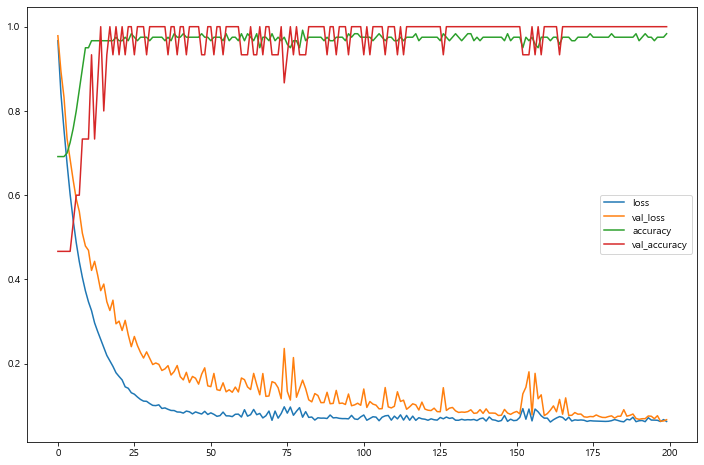

In [112]:
##### 시각화

print(result.history.keys())
plt.figure(figsize=(12,8))

plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])

plt.legend(["loss","val_loss","accuracy","val_accuracy"])

In [118]:
loss,acc = model.evaluate(X_test,y_test)
print(loss, acc)

15/15 [==============================] - 0s 133us/step
0.003732033772394061 1.0


In [119]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[7 0 0]
 [0 5 0]
 [0 0 3]]


In [122]:
pred = model.predict_classes(np.array([[5,2.9,1,0.2]]))
pred

iris["species"].unique()[pred]

array(['setosa'], dtype=object)

# 4) MNIST

+ 첫번째 형태 : 가장 simple한 설계


In [2]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
#### one-hot encoding

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
#### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력


X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

model = Sequential()

model.add(Dense(64, input_dim=28*28, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20, batch_size=32)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 7.4368 - accuracy: 0.7299
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 1.4996 - accuracy: 0.8663
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.9030 - accuracy: 0.8922
Epoch 4/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.6268 - accuracy: 0.9099
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.4645 - accuracy: 0.9225
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.3602 - accuracy: 0.9318
Epoch 7/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2904 - accuracy: 0.9396
Epoch 8/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2376 - accuracy: 0.9466
Epoch 9/20
60000/60000 [==============================] - 7s 120us/ste

In [6]:
# 모델 평가

result = model.evaluate(X_test, y_test, batch_size =32)
print(result)


# 앞에거 loss 정확도 94 

10000/10000 [==============================] - 1s 63us/step
[0.31952142600113875, 0.9470000267028809]


In [12]:
### 모델 예측 

xhat_idx = np.random.choice(10000,10)
print(xhat_idx)
print(y_test[xhat_idx])

[9517 2303 6979 3595 5888 7986 1898 8403 5158 9877]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [16]:
model.predict_classes(X_test[xhat_idx]) # 9 3 0 5 4 2 0 7 3 5

for i in range(10):
    print(np.argmax(y_test[xhat_idx[i]]))

9
3
0
5
4
2
0
7
3
5


In [17]:
print(model.predict_classes(X_test[xhat_idx]))

[9 3 0 5 2 2 0 7 3 5]


+ 두 번째 형태 : 표준화, K-FOLD Cross Validation

In [22]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



# 표준화
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255
X_test = X_test.reshape(-1, 28*28).astype("float32") /255


# validation 분활(k-fold)

X_val= X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [23]:
#### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력




model = Sequential()

model.add(Dense(64, input_dim=28*28, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 110us/step - loss: 0.7511 - accuracy: 0.8033 - val_loss: 0.3426 - val_accuracy: 0.9078
Epoch 2/10
50000/50000 [==============================] - 5s 108us/step - loss: 0.3056 - accuracy: 0.9146 - val_loss: 0.2672 - val_accuracy: 0.9263
Epoch 3/10
50000/50000 [==============================] - 5s 100us/step - loss: 0.2494 - accuracy: 0.9302 - val_loss: 0.2299 - val_accuracy: 0.9355
Epoch 4/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.2167 - accuracy: 0.9395 - val_loss: 0.2085 - val_accuracy: 0.9414
Epoch 5/10
50000/50000 [==============================] - 5s 100us/step - loss: 0.1935 - accuracy: 0.9450 - val_loss: 0.1915 - val_accuracy: 0.9454
Epoch 6/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.1762 - accuracy: 0.9496 - val_loss: 0.1835 - val_accuracy: 0.9471
Epoch 7/10
50000/50000 [==============================] - 5s 1

In [24]:
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 0s 40us/step
[0.13456922458931803, 0.960099995136261]


+ 세 번째 형태 : 텐서보드, 모델 저장

In [25]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



# 표준화
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255
X_test = X_test.reshape(-1, 28*28).astype("float32") /255


# validation 분활(k-fold)

X_val= X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [26]:
#### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력




model = Sequential()

model.add(Dense(64, input_dim=28*28, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

# Tensorboard 설정
tf_hist = keras.callbacks.TensorBoard(log_dir = "./graph", write_graph=True, write_images=True)


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),
         callbacks=[tf_hist])

# 모델 저장

model.save("data1/mnist_model.h5")

Train on 50000 samples, validate on 10000 samples


Epoch 1/10
50000/50000 [==============================] - 5s 109us/step - loss: 0.7491 - accuracy: 0.8119 - val_loss: 0.3459 - val_accuracy: 0.9037

Epoch 2/10
50000/50000 [==============================] - 5s 104us/step - loss: 0.3034 - accuracy: 0.9135 - val_loss: 0.2648 - val_accuracy: 0.9260
Epoch 3/10
50000/50000 [==============================] - 5s 104us/step - loss: 0.2466 - accuracy: 0.9299 - val_loss: 0.2315 - val_accuracy: 0.9342
Epoch 4/10
50000/50000 [==============================] - 5s 104us/step - loss: 0.2137 - accuracy: 0.9392 - val_loss: 0.2071 - val_accuracy: 0.9414
Epoch 5/10
50000/50000 [==============================] - 6s 119us/step - loss: 0.1902 - accuracy: 0.9463 - val_loss: 0.1879 - val_accuracy: 0.9456
Epoch 6/10
50000/50000 [==============================] - 6s 120us/step - loss: 0.1710 - accuracy: 0.9509 - val_loss: 0.1724 - val_accuracy: 0.9496
Epoch 7/10
50000/50000 [==============================] - 6

In [30]:
# 모델 불러오기
model2 = load_model("data1/mnist_model.h5")

In [31]:
# 모델 평가
result = model2.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 1s 54us/step
[0.13171990400254727, 0.9599000215530396]


---
+ 네 번째 형태 : 조기 종료(EarlyStopping)

     -EarlyStopping(monitor= "val_loss", min_delta=0, patience=0)
        + monitor : 관찰하고자 하는 항목. val_loss나 val_acc가 사용된다
        + min_delta : 개선되고 있다고 판단하기 위한 최소 변화량. 보통은 0을 가정
        + patience : 지정된 값까지 기다렸다가 종료

In [32]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



# 표준화
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255
X_test = X_test.reshape(-1, 28*28).astype("float32") /255


# validation 분활(k-fold)

X_val= X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [35]:
#### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력




model = Sequential()

model.add(Dense(64, input_dim=28*28, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

# Tensorboard 설정
tf_hist = keras.callbacks.TensorBoard(log_dir = "./graph", write_graph=True, write_images=True)


#조기 종료 
early =EarlyStopping()

model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val,y_val),
         callbacks=[tf_hist,early])



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 141us/step - loss: 0.7455 - accuracy: 0.8038 - val_loss: 0.3421 - val_accuracy: 0.9084
Epoch 2/10
50000/50000 [==============================] - 7s 135us/step - loss: 0.3039 - accuracy: 0.9154 - val_loss: 0.2641 - val_accuracy: 0.9271
Epoch 3/10
50000/50000 [==============================] - 5s 98us/step - loss: 0.2465 - accuracy: 0.9305 - val_loss: 0.2287 - val_accuracy: 0.9334
Epoch 4/10
50000/50000 [==============================] - 5s 99us/step - loss: 0.2130 - accuracy: 0.9398 - val_loss: 0.2030 - val_accuracy: 0.9407
Epoch 5/10
50000/50000 [==============================] - 5s 97us/step - loss: 0.1893 - accuracy: 0.9460 - val_loss: 0.1860 - val_accuracy: 0.9444
Epoch 6/10
50000/50000 [==============================] - 5s 96us/step - loss: 0.1713 - accuracy: 0.9509 - val_loss: 0.1721 - val_accuracy: 0.9493
Epoch 7/10
50000/50000 [==============================] - 5s 96us/


+ 다섯 번째 형태 : 함수화,dropout

In [44]:
def make_model(input_num, output_num, hidden_layer):
    model = Sequential()

    model.add(Dense(hidden_layer[0], input_dim=input_num, activation="relu"))
    model.add(Dense(hidden_layer[1], activation="relu"))
    model.add(Dense(hidden_layer[2], activation="relu"))
    model.add(Dense(hidden_layer[3], activation="relu"))
    
    # dropout
    model.add(keras.layers.core.Dropout(0.2))
    
    model.add(Dense(output_num, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
    return model

In [45]:
from keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

#### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 표준화
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255
X_test = X_test.reshape(-1, 28*28).astype("float32") /255

##### 피라미터
input_num = 28*28
output_num = 10
hidden_layer = [255, 255, 255, 255]


model = make_model(input_num, output_num, hidden_layer)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.3972 - accuracy: 0.8848 - val_loss: 0.1658 - val_accuracy: 0.9492
Epoch 2/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.1516 - accuracy: 0.9554 - val_loss: 0.1026 - val_accuracy: 0.9703
Epoch 3/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.1053 - accuracy: 0.9685 - val_loss: 0.0704 - val_accuracy: 0.9808
Epoch 4/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.0569 - val_accuracy: 0.9838
Epoch 5/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 6/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 7/20
60000/60000 [==============================] 

In [48]:
### 모델평가

# 모델 평가
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 1s 103us/step
[0.08325892577165118, 0.982200026512146]


# (4) CNN
 + sample은 mnist
 + convolution layer는 3개
 + 필터 갯수는 32개,크기는 3*3

In [54]:
from keras import layers


# 모델 설계

model = Sequential()

# 첫번째 conv layer

model.add(keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))


# 두번째 conv layer

model.add(keras.layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPool2D(2,2))

# 세번째 conv layer

model.add(keras.layers.Conv2D(64,(3,3), activation="relu"))

# FC Layer

model.add(layers.Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [52]:
?keras.layers.Conv2D

In [55]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 표준화
X_train = X_train.reshape(60000, 28,28,1).astype("float32") / 255
X_test = X_test.reshape(10000, 28,28,1).astype("float32") /255


model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 52s 859us/step - loss: 0.6929 - accuracy: 0.8196
Epoch 2/5
60000/60000 [==============================] - 55s 913us/step - loss: 0.1727 - accuracy: 0.9500
Epoch 3/5
60000/60000 [==============================] - 53s 884us/step - loss: 0.1218 - accuracy: 0.9644
Epoch 4/5
60000/60000 [==============================] - 51s 850us/step - loss: 0.0983 - accuracy: 0.9711
Epoch 5/5
60000/60000 [==============================] - 50s 835us/step - loss: 0.0833 - accuracy: 0.9751


In [56]:
# 모델 평가
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 4s 401us/step
[0.06632563484488055, 0.9799000024795532]


In [1]:
# (5) RNN


In [52]:
from keras.datasets import reuters

In [53]:
# num_words : 데이터에서 등장 빈도 순위로 몇 번째 해당하는 단어까지 사용할 것인지를 지정
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print("훈련용 뉴스 기사 : ", len(X_train))
print("테스트용 뉴스 기사 : ", len(X_test))
print("카테고리 : ", max(y_train) + 1)

훈련용 뉴스 기사 :  8982
테스트용 뉴스 기사 :  2246
카테고리 :  46


In [54]:
# 첫 번째 훈련용 뉴스 기사
print(X_train[0])
print(y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [56]:
# 뉴스 기사의 길이
print("최대 길이 : ", max(len(i) for i in X_train))
print("평균 길이 : ", sum(map(len, X_train)) / len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel("샘플의 길이")
plt.ylabel("샘플의 갯수")

최대 길이 :  2376
평균 길이 :  145.5398574927633


NameError: name 'plt' is not defined

In [57]:
# 카테고리별 빈도수 확인

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

NameError: name 'plt' is not defined

In [58]:
# 카테고리별 정확한 빈도수 확인(수치)
category, counts = np.unique(y_train, return_counts=True)
print(category)
print("-----------------------------")
print(counts)

NameError: name 'np' is not defined

In [59]:
# 각 단어별 빈도수에 대한 순위 확인
word_to_index = reuters.get_word_index()
print(word_to_index)

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

In [60]:
# 빈도수 순위에 따른 해당 단어 알아내기 
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key
    

In [14]:
print("빈도수 상위28842번째 단어:", index_to_word[28842])
print("빈도수 상위 1번째 단어:", index_to_word[1])

빈도수 상위28842번째 단어: nondiscriminatory
빈도수 상위 1번째 단어: the


In [16]:
print(" ".join([index_to_word[i] for i in X_train[0]]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


# (2) RNN

In [18]:
(X_train, y_train), (X_test,y_test) = reuters.load_data(num_words=3000, test_split=0.2, maxlen=100)


print("훈련용 뉴스 기사:", len(X_train))
print("테스트용 뉴스 기사:", len(X_test))



훈련용 뉴스 기사: 4777
테스트용 뉴스 기사: 1195


In [19]:
print(len(X_train[0]))

87


In [23]:
# 문장의 길이를 맞춰준다.

from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train,padding="post")
X_test = pad_sequences(X_test,padding="post")

print(X_train[0])
print(X_train.shape)
print(y_train)

[   1    2    2    8   43   10  447    5   25  207  270    5    2  111
   16  369  186   90   67    7   89    5   19  102    6   19  124   15
   90   67   84   22  482   26    7   48    4   49    8  864   39  209
  154    6  151    6   83   11   15   22  155   11   15    7   48    9
    2 1005  504    6  258    6  272   11   15   22  134   44   11   15
   16    8  197 1245   90   67   52   29  209   30   32  132    6  109
   15   17   12    0    0    0    0    0    0    0    0    0    0    0
    0]
(4777, 99)
[3 4 3 ... 5 4 3]


In [34]:
from keras.utils import to_categorical

# 학습 데이터와 테스트 데이터를 3차원으로 맞춰주기
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

# 레이블을 원핫 인코딩으로 처리
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_data

y_train = y_data[:1395]
y_test = y_data[1395:]

print(y_train.shape)
print(y_test.shape)

(4777, 99, 1)
(1195, 99, 1)


NameError: name 'np' is not defined

# (4) Vanilla RNN

In [38]:
from keras.layers import SimpleRNN
from keras.wrappers.scikit_learn import KerasClassifier

In [43]:
# 단층 RNN : return_sequences
# 메모리셀이 모든 시점(Time Step)에 대해서 hidden state을 출력할 때 True
# 다층 모델일 경우에도 True
# 메모리셀이 하나의 hidden state만 출력하면 False

def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(49, 1), return_sequences=False))
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

In [44]:
model = KerasClassifier(build_fn=vanilla_rnn, epochs=200, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8035 - accuracy: 0.7484

NameError: name 'Sequential' is not defined

In [61]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred, y_test_)) # 0.7545909849749582

AttributeError: 'KerasClassifier' object has no attribute 'model'

In [62]:
# 다층 RNN

def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(49, 1), return_sequences=True))
    model.add(SimpleRNN(units=50, return_sequences=False))
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

In [63]:
model = KerasClassifier(build_fn=stacked_vanilla_rnn, epochs=200, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.5129 - accuracy: 0.8108

NameError: name 'Sequential' is not defined

# 5.LSTM

In [64]:
from keras.layers import LSTM

In [65]:
def lstm_rnn():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(49, 1), return_sequences=False))
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

In [66]:
model = KerasClassifier(build_fn=lstm_rnn, epochs=200, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.3549 - accuracy: 0.8996

NameError: name 'Sequential' is not defined

In [67]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred, y_test_)) # 0.8580968280467446

AttributeError: 'KerasClassifier' object has no attribute 'model'